# Loan Default Prediction
Author: Alice Zhou

Machine learning techniques are increasingly being used in the loan default prediction. When constructing a predictive model, it is important to use different methods to improve the model performance and therefore decrease the costs of loan default detection. 
- Objectives: This report uses a hypothetical loan dataset for loan default prediction. By using supervised machine learning (GBM and Deep Learning), different methods (inlcuding feature engineering, sampling methods, and hyper-parameters tuning) will be tested to improve the model performance. 
- Dataset: The dataset contains information on loan application details, borrower's credit history from Credit Bureau, borrower's financial query records, borrower's call records, and third-party data. 

# Table of Contents
- [1. Data Preparation](#1)
- [2. GBM (Gradient Boosting Machine)](#2)
    - [2.1 Build Model (Raw Variables)](#21)
        - [2.1.1 Model Performance: AUC=0.6837, PR=0.3319, lift(for 1st decile)=2.03](#211)
        - [2.1.2 Variable Importance](#212)
    - [2.2 Feature Engineering](#22)
        - [2.2.1 Feature Selection](#221)
            - [2.2.1.1 Iterate Model](#2211)
            - [2.2.1.2 Model Performance: AUC=0.6839, PR=0.3331, lift(for 1st decile)=2.06](#2212)
        - [2.2.2 WOE Transformation](#222)
            - [2.2.2.1 Iterate Model](#2221)
            - [2.2.2.2 Model Performance: AUC=0.7847, PR=0.4956, lift(for 1st decile)=2.90](#2222)
    - [2.3 Hyperparameter Tuning](#23)
        - [2.3.1 nfolds](#231)
            - [2.3.1.1 Iterate Model](#2311)
            - [2.3.1.2 Model Performance: AUC=0.7847, PR=0.4956, lift(for 1st decile)=2.90](#2312)
        - [2.3.2 balance_classes](#232)
            - [2.3.2.1 Iterate Model](#2321)
            - [2.3.2.2 Model Performance: AUC=0.7847, PR=0.4956, lift(for 1st decile)=2.90](#2322)
        - [2.3.3 learning_rates, ntrees, max_depths & min_rows](#233)
            - [2.3.3.1 Iterate Model](#2331)
            - [2.3.3.2 Model Performance: AUC=0.7855, PR=0.4986, lift(for 1st decile)=2.91](#2332)
- [3. Deep Learning](#3)
    - [3.1 Build Model (Raw Variables)](#31)
        - [3.1.1 Model Performance](#311)
        - [3.1.2 Variable Importance: AUC=0.6485, PR=0.2963, lift(for 1st decile)=1.81](#312)
    - [3.2 Feature Engineering](#32)
        - [3.2.1 Iterate Model](#321)
        - [3.2.2 Model Performance: AUC=0.6846, PR=0.3749, lift(for 1st decile)=2.34](#322)
    - [3.3 Hyperparameter Tuning (hidden, input_dropout_ratio, l1) ](#33)
        - [3.3.1 Iterate Model](#331)
        - [3.3.2 Model Performance: AUC=0.7581, PR=0.4676, lift(for 1st decile)=2.72](#332)
- [4. Conclusion](#4)

## 1. Data Preparation <a class="anchor" id="1"></a>

In [1]:
import numpy as np
import datetime
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
path = '/Users/alicezhou/Documents/Columbia/5420 Anomaly Detection/9. Supervised Machine Learning Techniques I/Assignment9/'
df = pd.read_csv(path + 'XYZloan_default_selected_vars.csv') 

Some basic understandings of the raw data:
- Each raw is a borrower (id), and the other variables are the information related to this borrower.
- For the loan default predictive model, "loan_default" is the target variable.
- There are more than 80 variables that can be used as input variables.

In [3]:
# Get the Simple Summary Statistics 
df.describe() 

,Unnamed: 0.1,Unnamed: 0,id,loan_default,AP001,AP002,AP003,AP004,AP007,AP008,...,CD160,CD162,CD164,CD166,CD167,CD169,CD170,CD172,CD173,MB005
count,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000,80000.00000,80000.000000,...,79619.000000,79619.000000,79619.000000,79619.000000,79619.000000,79619.000000,79619.00000,79619.000000,79619.000000,77207.000000
mean,39999.500000,40000.500000,40000.500000,0.193600,31.706913,1.321813,2.014925,11.235413,3.30130,3.117200,...,6.911956,14.271694,11.773358,909.089313,810.786219,1732.693314,1539.33443,2513.226491,2229.606137,5.976272
std,23094.155105,23094.155105,23094.155105,0.395121,7.075070,0.467174,1.196806,2.212313,1.33655,1.306335,...,28.007499,38.235012,33.270641,1379.553332,1245.044602,2441.503517,2172.71384,3404.975112,3005.615048,3.641814
min,0.000000,1.000000,1.000000,0.000000,20.000000,1.000000,1.000000,3.000000,1.00000,1.000000,...,-99.000000,-99.000000,-99.000000,-99.000000,-99.000000,-99.000000,-99.00000,-99.000000,-99.000000,0.000000
25%,19999.750000,20000.750000,20000.750000,0.000000,27.000000,1.000000,1.000000,12.000000,2.00000,2.000000,...,2.000000,5.000000,4.000000,84.000000,34.000000,309.000000,226.00000,539.000000,414.000000,3.000000
50%,39999.500000,40000.500000,40000.500000,0.000000,30.000000,1.000000,1.000000,12.000000,3.00000,3.000000,...,7.000000,12.000000,10.000000,475.000000,397.000000,1023.000000,870.00000,1553.000000,1324.000000,5.000000
75%,59999.250000,60000.250000,60000.250000,0.000000,35.000000,2.000000,3.000000,12.000000,5.00000,4.000000,...,14.000000,23.000000,20.000000,1209.000000,1080.000000,2287.000000,2030.00000,3296.000000,2936.000000,8.000000
max,79999.000000,80000.000000,80000.000000,1.000000,56.000000,2.000000,6.000000,12.000000,5.00000,5.000000,...,1061.000000,2792.000000,1579.000000,48585.000000,29664.000000,88364.000000,54651.00000,125352.000000,87312.000000,47.000000


From the variable statistics, we can see that there are some special values (eg. -99) in some variables (eg. CD172, CD173). I will investigate what other special values and create categories to distinct them later. 

In [4]:
# Train test split
from sklearn.model_selection import train_test_split
train, test = train_test_split(df, test_size=0.40, random_state=42)

In [5]:
train.shape

(48000, 89)

In [6]:
# Categorize the variables' data source
var = pd.DataFrame(train.dtypes).reset_index()
var.columns = ['varname','dtype'] 
var['source'] = var['varname'].str[:2]
var.head(10)

,varname,dtype,source
0,Unnamed: 0.1,int64,Un
1,Unnamed: 0,int64,Un
2,id,int64,id
3,loan_default,int64,lo
4,AP001,int64,AP
5,AP002,int64,AP
6,AP003,int64,AP
7,AP004,int64,AP
8,AP005,object,AP
9,AP006,object,AP


In [7]:
# Investigate variables' data type 
var['dtype'].value_counts()

float64    58
int64      28
object      3
Name: dtype, dtype: int64

In [8]:
# There are 3 categorical variables, and the other are numeric variables
var[var['dtype']=='object']

,varname,dtype,source
8,AP005,object,AP
9,AP006,object,AP
88,MB007,object,MB


In [9]:
# Summarize the data source
var['source'].value_counts()

CD    36
TD    24
AP     9
CR     8
PA     6
Un     2
MB     2
id     1
lo     1
Name: source, dtype: int64

In [10]:
# "AP005" is dropped since it's a timestamp data, which cannot be employed in tree-based methods
MB_list = list(var[var['source']=='MB']['varname'])
AP_list = list(var[(var['source']=='AP') & (var['varname']!='AP005')]['varname'])
TD_list = list(var[var['source']=='TD']['varname'])
CR_list = list(var[var['source']=='CR']['varname'])
PA_list = list(var[var['source']=='PA']['varname'])
CD_list = list(var[var['source']=='CD']['varname'])
AP_list

['AP001', 'AP002', 'AP003', 'AP004', 'AP006', 'AP007', 'AP008', 'AP009']

In [11]:
# Distribution of bad (1) and good (0) loans
train['loan_default'].value_counts(dropna=False)

0    38736
1     9264
Name: loan_default, dtype: int64

It is clearly that target variable (loan_default) has very imbalanced distribution, which will be considered for model tuning later.

In [12]:
import h2o
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321. connected.


H2O_cluster_uptime:,15 secs
H2O_cluster_timezone:,America/New_York
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.42.0.1
H2O_cluster_version_age:,1 month and 5 days
H2O_cluster_name:,H2O_from_python_alicezhou_atgjl0
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.984 Gb
H2O_cluster_total_cores:,8
H2O_cluster_allowed_cores:,8
H2O_cluster_status:,"locked, healthy"


## 2. GBM (Gradient Boosting Machine) <a class="anchor" id="2"></a>

GBM is a powerful and versatile machine learning algorithm well-suited for loan default prediction projects. It can handle non-linear relationships, class imbalance, missing data, and provides feature importance information, making it an effective choice for risk assessment and decision-making in the loan industry.
1. Handling Non-linearity: Loan default prediction involves complex relationships between various features, and the data may exhibit non-linear patterns. GBM, by using an ensemble of decision trees, can effectively model non-linear relationships between features and the target variable (default or non-default).
2. Feature Importance: GBM provides feature importance scores, which can help identify the most significant features in predicting loan default. This information aids feature selection and understanding the driving factors behind loan defaults.
3. Handling Imbalanced Data: GBM can handle class imbalance well, which is a common issue in loan default prediction where defaulting loans are often a minority class. Techniques like weighted sampling or boosting can be used to address class imbalance effectively.
4. Ensemble of Weak Learners: GBM combines multiple weak learners (individual decision trees) to create a strong learner. This ensemble approach improves the model's predictive accuracy and robustness.
5. Regularization: GBM has built-in regularization techniques like shrinkage (learning rate) and depth constraints on decision trees, which help prevent overfitting and improve generalization to unseen data.
6. Interpretability: Though not as interpretable as linear models, GBM's feature importance scores and partial dependence plots can provide insights into the model's predictions, making it easier to explain and justify decisions to stakeholders.

For the modeling part, I will run with a small sample dataset first, and then try to write repeating code in a function. 

In [13]:
target='loan_default'
predictors = CR_list + TD_list + AP_list + MB_list + CR_list + PA_list 

In [14]:
# Sample 10% of the original train and test datasets 
train_smpl = train.sample(frac=0.1, random_state=1)
test_smpl = test.sample(frac=0.1, random_state=1)

# Convert sampled DataFrames into H2OFrame objects
train_hex = h2o.H2OFrame(train_smpl)
test_hex = h2o.H2OFrame(test_smpl)

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [15]:
# Build GBM model for sample data
from h2o.estimators import H2OGradientBoostingEstimator
gbm_v1 = H2OGradientBoostingEstimator(
        model_id = 'gbm_v1',
        seed=1234)
gbm_v1.train(predictors,target,training_frame=train_hex)

gbm Model Build progress: |██████████████████████████████████████████████████████| (done) 100%


Model Details
=============
H2OGradientBoostingEstimator : Gradient Boosting Machine
Model Key: gbm_v1


Model Summary: 
    number_of_trees    number_of_internal_trees    model_size_in_bytes    min_depth    max_depth    mean_depth    min_leaves    max_leaves    mean_leaves
--  -----------------  --------------------------  ---------------------  -----------  -----------  ------------  ------------  ------------  -------------
    50                 50                          20139                  5            5            5             14            32            24.94

ModelMetricsRegression: gbm
** Reported on train data. **

MSE: 0.10943918026770914
RMSE: 0.33081593109720264
MAE: 0.24675445966107265
RMSLE: 0.22936846598148825
Mean Residual Deviance: 0.10943918026770914

Scoring History: 
     timestamp            duration    number_of_trees    training_rmse        training_mae         training_deviance
---  -------------------  ----------  -----------------  -------------------  -------------------  -------------------
     2023-07-26 00:13:48  0.103 sec   0.0                0.3906456105673761   0.3052079861111131   0.15260399305555808
     2023-07-26 00:13:49  0.262 sec   1.0                0.38727868648376024  0.30245092027820647  0.14998478100458665
     2023-07-26 00:13:49  0.302 sec   2.0                0.38421540310452973  0.2998462053326269   0.14762147598277628
     2023-07-26 00:13:49  0.330 sec   3.0                0.3817198374960461   0.29759392105353377  0.14571003433800783
     2023-07-26 00:13:49  0.352 sec   4.0                0.37932947521164534  0.2953496100877722   0.14389085076434224
     2023-07-26 00:13:49  0.378 sec   5.0                0.3773529621087762   0.2934634825789059   0.14239525801226752
     2023-07-26 00:13:49  0.395 sec   6.0                0.37504199925867177  0.2913338880054653   0.14065650120794157
     2023-07-26 00:13:49  0.408 sec   7.0                0.37313367455227936  0.2894011447485536   0.13922873908488634
     2023-07-26 00:13:49  0.420 sec   8.0                0.3714001916111147   0.2876592381748681   0.1379381023287727
     2023-07-26 00:13:49  0.432 sec   9.0                0.36991760439627835  0.2861185516246284   0.1368390340422815
---  ---                  ---         ---                ---                  ---                  ---
     2023-07-26 00:13:49  0.801 sec   41.0               0.3382141611823086   0.25388020255816324  0.11438881882425264
     2023-07-26 00:13:49  0.806 sec   42.0               0.33726668219675293  0.25299177165181996  0.11374881492000555
     2023-07-26 00:13:49  0.812 sec   43.0               0.3361552043898833   0.25194446654907854  0.11300032143840419
     2023-07-26 00:13:49  0.818 sec   44.0               0.335296398038004    0.25105304235438475  0.11242367453725961
     2023-07-26 00:13:49  0.824 sec   45.0               0.3343597569252652   0.25016243955721923  0.11179644705112243
     2023-07-26 00:13:49  0.833 sec   46.0               0.33349454422209074  0.24927122944725852  0.11121861102590003
     2023-07-26 00:13:49  0.845 sec   47.0               0.33304935608714714  0.24889523815093223  0.11092187359006334
     2023-07-26 00:13:49  0.853 sec   48.0               0.3323873213845104   0.24821919728275438  0.11048133141716979
     2023-07-26 00:13:49  0.860 sec   49.0               0.33157994552234893  0.24748958011743524  0.10994526027260387
     2023-07-26 00:13:49  0.865 sec   50.0               0.33081593109720264  0.24675445966107265  0.10943918026770914
[51 rows x 7 columns]


Variable Importances: 
variable    relative_importance    scaled_importance     percentage
----------  ---------------------  --------------------  ---------------------
MB007       218.24954223632812     1.0                   0.20380808208242826
TD013       58.429744720458984     0.2677198958666738    0.05456347851189419
AP004       53.13219451904297      0.2434469917994586    0.0496164644873843
TD009       52.441444396972656     0.24028203614826946

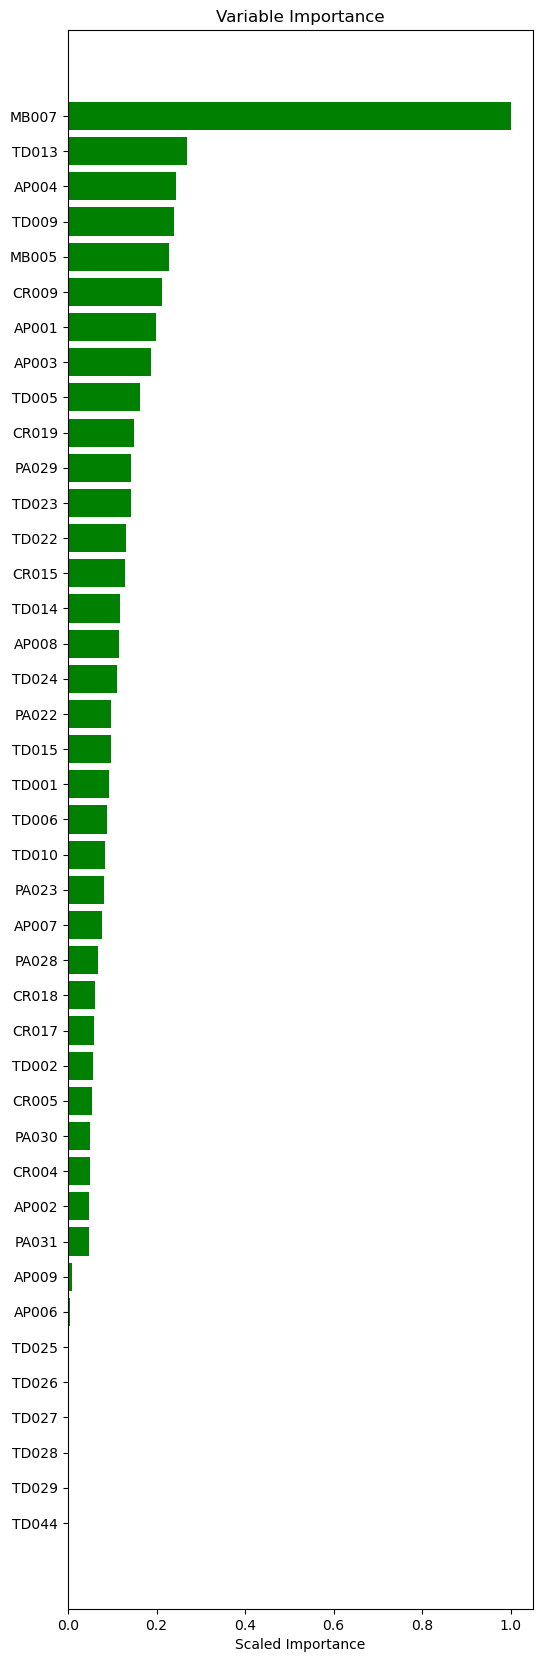

In [16]:
# Create a function to show the variable importance 
def VarImp(model_name):
    
    from sklearn.metrics import roc_curve,auc
    from sklearn.metrics import average_precision_score
    from sklearn.metrics import precision_recall_curve
    import matplotlib.pyplot as plt
    
    # plot the variable importance
    plt.rcdefaults()
    variables = model_name._model_json['output']['variable_importances']['variable']
    y_pos = np.arange(len(variables))
    fig, ax = plt.subplots(figsize = (6,len(variables)/2))
    scaled_importance = model_name._model_json['output']['variable_importances']['scaled_importance']
    ax.barh(y_pos,scaled_importance,align='center',color='green')
    ax.set_yticks(y_pos)
    ax.set_yticklabels(variables)
    ax.invert_yaxis()
    ax.set_xlabel('Scaled Importance')
    ax.set_title('Variable Importance')
    plt.show()
    
VarImp(gbm_v1)

In [17]:
# Comparison between model predictions and actual target values
predictions = gbm_v1.predict(test_hex)
predictions.head()
test_scores = test_hex['loan_default'].cbind(predictions).as_data_frame()
test_scores.head()

gbm prediction progress: |███████████████████████████████████████████████████████| (done) 100%


,loan_default,predict
0,0,0.254071
1,0,0.106050
2,0,0.083595
3,0,0.242938
4,0,0.122265


gbm prediction progress: |███████████████████████████████████████████████████████| (done) 100%

   * ROC curve: The ROC curve plots the true positive rate vs. the false rositive sate

	  * The area under the curve (AUC): A value between 0.5 (random) and 1.0 (perfect), measuring the prediction accuracy

   * Recall (R) = The number of true positives / (the number of true positives + the number of false negatives)



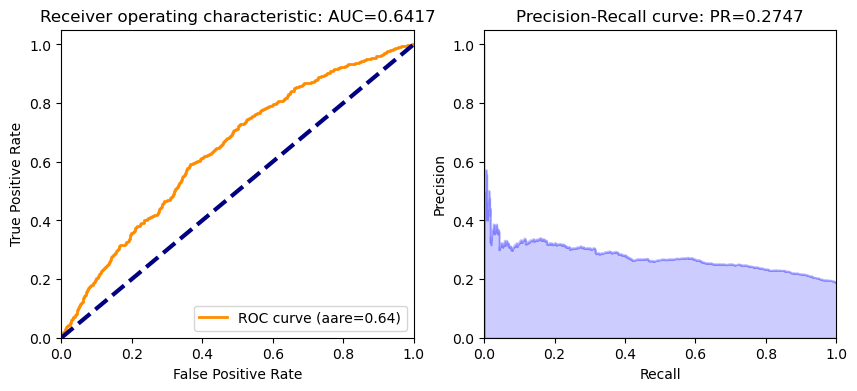

In [18]:
# Create a function to plot the ROC curve and precision-recall curve
def ROC_AUC(my_result,df,target):
    from sklearn.metrics import roc_curve,auc
    from sklearn.metrics import average_precision_score
    from sklearn.metrics import precision_recall_curve
    import matplotlib.pyplot as plt

    # ROC
    y_actual = df[target].as_data_frame()
    y_pred = my_result.predict(df).as_data_frame()
    fpr = list()
    tpr = list()
    roc_auc = list()
    fpr,tpr,_ = roc_curve(y_actual,y_pred)
    roc_auc = auc(fpr,tpr)
    
    # Precision-Recall
    average_precision = average_precision_score(y_actual,y_pred)

    print('')
    print('   * ROC curve: The ROC curve plots the true positive rate vs. the false rositive sate')
    print('')
    print('	  * The area under the curve (AUC): A value between 0.5 (random) and 1.0 (perfect), measuring the prediction accuracy')
    print('')
    print('   * Recall (R) = The number of true positives / (the number of true positives + the number of false negatives)')
    print('')
    
    # plotting
    plt.figure(figsize=(10,4))

    # ROC
    plt.subplot(1,2,1)
    plt.plot(fpr,tpr,color='darkorange',lw=2,label='ROC curve (aare=%0.2f)' % roc_auc)
    plt.plot([0,1],[0,1],color='navy',lw=3,linestyle='--')
    plt.xlim([0.0,1.0])
    plt.ylim([0.0,1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic: AUC={0:0.4f}'.format(roc_auc))
    plt.legend(loc='lower right')

    # Precision-Recall
    plt.subplot(1,2,2)
    precision,recall,_ = precision_recall_curve(y_actual,y_pred)
    plt.step(recall,precision,color='b',alpha=0.2,where='post')
    plt.fill_between(recall,precision,step='post',alpha=0.2,color='b')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.ylim([0.0,1.05])
    plt.xlim([0.0,1.0])
    plt.title('Precision-Recall curve: PR={0:0.4f}'.format(average_precision))
    plt.show()

ROC_AUC(gbm_v1,test_hex,'loan_default')

In [19]:
# Create a function to generate gains table and show the cumulative lift
def createGains(model):
    predictions = model.predict(test_hex)
    test_scores = test_hex['loan_default'].cbind(predictions).as_data_frame()

    #sort on prediction (descending), add id, and decile for groups containing 1/10 of datapoints
    test_scores = test_scores.sort_values(by='predict',ascending=False)
    test_scores['row_id'] = range(0,0+len(test_scores))
    test_scores['decile'] = ( test_scores['row_id'] / (len(test_scores)/10) ).astype(int)
    #see count by decile
    test_scores.loc[test_scores['decile'] == 10]=9
    test_scores['decile'].value_counts()

    #create gains table
    gains = test_scores.groupby('decile')['loan_default'].agg(['count','sum'])
    gains.columns = ['count','actual']
    gains

    #add features to gains table
    gains['non_actual'] = gains['count'] - gains['actual']
    gains['cum_count'] = gains['count'].cumsum()
    gains['cum_actual'] = gains['actual'].cumsum()
    gains['cum_non_actual'] = gains['non_actual'].cumsum()
    gains['percent_cum_actual'] = (gains['cum_actual'] / np.max(gains['cum_actual'])).round(2)
    gains['percent_cum_non_actual'] = (gains['cum_non_actual'] / np.max(gains['cum_non_actual'])).round(2)
    gains['if_random'] = np.max(gains['cum_actual']) /10 
    gains['if_random'] = gains['if_random'].cumsum()
    gains['lift'] = (gains['cum_actual'] / gains['if_random']).round(2)
    gains['K_S'] = np.abs( gains['percent_cum_actual'] -  gains['percent_cum_non_actual'] ) * 100
    gains['gain']=(gains['cum_actual']/gains['cum_count']*100).round(2)
    gains = pd.DataFrame(gains)
    return(gains)

createGains(gbm_v1)

gbm prediction progress: |███████████████████████████████████████████████████████| (done) 100%


,count,actual,non_actual,cum_count,cum_actual,cum_non_actual,percent_cum_actual,percent_cum_non_actual,if_random,lift,K_S,gain
decile,,,,,,,,,,,,
0,320,105,215,320,105,215,0.18,0.08,60.0,1.75,10.0,32.81
1,320,85,235,640,190,450,0.32,0.17,120.0,1.58,15.0,29.69
2,320,63,257,960,253,707,0.42,0.27,180.0,1.41,15.0,26.35
3,320,95,225,1280,348,932,0.58,0.36,240.0,1.45,22.0,27.19
4,320,52,268,1600,400,1200,0.67,0.46,300.0,1.33,21.0,25.00
5,320,60,260,1920,460,1460,0.77,0.56,360.0,1.28,21.0,23.96
6,320,51,269,2240,511,1729,0.85,0.66,420.0,1.22,19.0,22.81
7,320,37,283,2560,548,2012,0.91,0.77,480.0,1.14,14.0,21.41
8,320,25,295,2880,573,2307,0.96,0.89,540.0,1.06,7.0,19.90


### 2.1 Build Model <a class="anchor" id="21"></a>

Now the code works fine with the small dataset, we can model with the entire dataset¶

In [20]:
# Convert entire train & test DataFrames into H2OFrame objects
train_hex = h2o.H2OFrame(train)
test_hex = h2o.H2OFrame(test)

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [21]:
# Build GBM models with all the original variables and default hyperparameters
gbm_v2 = H2OGradientBoostingEstimator(
        model_id = 'gbm_v2',
        seed=1234)
gbm_v2.train(predictors,target,training_frame=train_hex)

gbm Model Build progress: |██████████████████████████████████████████████████████| (done) 100%


Model Details
=============
H2OGradientBoostingEstimator : Gradient Boosting Machine
Model Key: gbm_v2


Model Summary: 
    number_of_trees    number_of_internal_trees    model_size_in_bytes    min_depth    max_depth    mean_depth    min_leaves    max_leaves    mean_leaves
--  -----------------  --------------------------  ---------------------  -----------  -----------  ------------  ------------  ------------  -------------
    50                 50                          25488                  5            5            5             21            32            28.76

ModelMetricsRegression: gbm
** Reported on train data. **

MSE: 0.13865122383030543
RMSE: 0.3723589985891377
MAE: 0.284536297410598
RMSLE: 0.26047686817240207
Mean Residual Deviance: 0.13865122383030543

Scoring History: 
     timestamp            duration    number_of_trees    training_rmse        training_mae         training_deviance
---  -------------------  ----------  -----------------  -------------------  -------------------  -------------------
     2023-07-26 00:13:54  0.068 sec   0.0                0.39465301215116366  0.3115019999999918   0.15575099999998654
     2023-07-26 00:13:54  0.123 sec   1.0                0.39270124219325375  0.3098843842536832   0.15421426562012452
     2023-07-26 00:13:54  0.158 sec   2.0                0.3910667929850435   0.30841510233997055  0.15293323657560684
     2023-07-26 00:13:54  0.194 sec   3.0                0.3896489802052511   0.30706831261391443  0.1518263277749922
     2023-07-26 00:13:54  0.223 sec   4.0                0.3883816631092148   0.3057810212833186   0.1508403162394796
     2023-07-26 00:13:54  0.236 sec   5.0                0.3873148214400086   0.3046250854929288   0.15001277090710574
     2023-07-26 00:13:54  0.252 sec   6.0                0.38630974528176193  0.30352590435914073  0.14923521929965977
     2023-07-26 00:13:54  0.267 sec   7.0                0.3854159865377974   0.3024990868475288   0.14854548267890363
     2023-07-26 00:13:54  0.283 sec   8.0                0.38460194156061517  0.3015462169284001   0.14791865345219485
     2023-07-26 00:13:54  0.304 sec   9.0                0.38390324275286264  0.3006935262714202   0.14738169979616336
---  ---                  ---         ---                ---                  ---                  ---
     2023-07-26 00:13:55  0.793 sec   41.0               0.37363891452842657  0.28632241962985183  0.13960603844998087
     2023-07-26 00:13:55  0.807 sec   42.0               0.3735168438254222   0.286115117456747    0.13951483262130485
     2023-07-26 00:13:55  0.825 sec   43.0               0.3733961236946044   0.2858984995220365   0.1394246651901563
     2023-07-26 00:13:55  0.843 sec   44.0               0.3732180114617127   0.2856710666360692   0.1392916840794351
     2023-07-26 00:13:55  0.859 sec   45.0               0.37307529126468664  0.285496163324921    0.13918517295223076
     2023-07-26 00:13:55  0.872 sec   46.0               0.37290380626316527  0.28527974520176336  0.1390572487255563
     2023-07-26 00:13:55  0.883 sec   47.0               0.3727730278125972   0.28510480529482146  0.13895973026457137
     2023-07-26 00:13:55  0.896 sec   48.0               0.37264219270739957  0.2849022240281411   0.1388622037857787
     2023-07-26 00:13:55  0.910 sec   49.0               0.37250143583963646  0.284702906266614    0.1387573197025908
     2023-07-26 00:13:55  0.924 sec   50.0               0.3723589985891377   0.284536297410598    0.13865122383030543
[51 rows x 7 columns]


Variable Importances: 
variable    relative_importance    scaled_importance    percentage
----------  ---------------------  -------------------  --------------------
MB007       633.0542602539062      1.0                  0.14749414137503516
TD013       546.6705932617188      0.8635446083917978   0.12736777055378923
AP004       498.3159484863281      0.7871615116948473   0.11610171129090621
AP003       485.0872497558594      0.7662648847214139   0.113019581

#### 2.1.1 Model Performance <a class="anchor" id="211"></a>

In loan default prediction, the model's performance is evaluated using different metrics, such as AUC (Area Under the Receiver Operating Characteristic Curve), PR (Precision-Recall), and Gains Table.

gbm prediction progress: |███████████████████████████████████████████████████████| (done) 100%

   * ROC curve: The ROC curve plots the true positive rate vs. the false rositive sate

	  * The area under the curve (AUC): A value between 0.5 (random) and 1.0 (perfect), measuring the prediction accuracy

   * Recall (R) = The number of true positives / (the number of true positives + the number of false negatives)



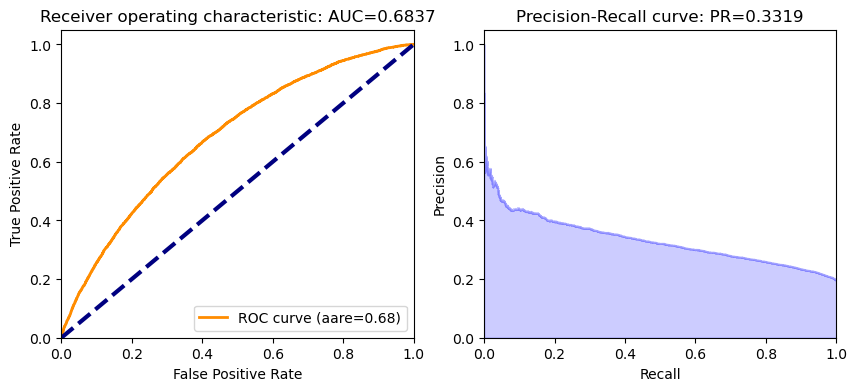

In [22]:
ROC_AUC(gbm_v2,test_hex,'loan_default')

AUC (Area Under the Curve): AUC is a popular metric for evaluating binary classification models. It measures the model's ability to distinguish between positive and negative samples. An AUC value of 0.6837 indicates that the model has moderate discriminatory power, but there is room for improvement. The AUC ranges from 0 to 1, where 0.5 represents random guessing, and 1 represents a perfect classifier.

PR (Precision-Recall): PR is another metric used for binary classification, especially when dealing with imbalanced datasets. It focuses on the trade-off between precision (positive predictive value) and recall (sensitivity or true positive rate). The PR value of 0.3319 indicates that the model's precision is relatively low compared to its recall. This means that while the model can identify a good proportion of actual loan defaults (high recall), it may also produce a considerable number of false positives (low precision).

In [23]:
createGains(gbm_v2)

gbm prediction progress: |███████████████████████████████████████████████████████| (done) 100%


,count,actual,non_actual,cum_count,cum_actual,cum_non_actual,percent_cum_actual,percent_cum_non_actual,if_random,lift,K_S,gain
decile,,,,,,,,,,,,
0,3200,1263,1937,3200,1263,1937,0.20,0.08,622.4,2.03,12.0,39.47
1,3200,1000,2200,6400,2263,4137,0.36,0.16,1244.8,1.82,20.0,35.36
2,3200,818,2382,9600,3081,6519,0.50,0.25,1867.2,1.65,25.0,32.09
3,3200,733,2467,12800,3814,8986,0.61,0.35,2489.6,1.53,26.0,29.80
4,3200,604,2596,16000,4418,11582,0.71,0.45,3112.0,1.42,26.0,27.61
5,3200,553,2647,19200,4971,14229,0.80,0.55,3734.4,1.33,25.0,25.89
6,3200,453,2747,22400,5424,16976,0.87,0.66,4356.8,1.24,21.0,24.21
7,3200,370,2830,25600,5794,19806,0.93,0.77,4979.2,1.16,16.0,22.63
8,3200,259,2941,28800,6053,22747,0.97,0.88,5601.6,1.08,9.0,21.02


Gains Table:

The gains table provides additional insights into how the model performs across different deciles. A decile represents a grouping of samples based on their predicted probabilities. The gains table shows the cumulative count of actual and non-actual (predicted) loan defaults for each decile, along with various evaluation metrics.

Key Metrics in the Gains Table:

- Cumulative Actual: Cumulative count of actual loan defaults observed in each decile.
- Cumulative Non-Actual: Cumulative count of non-defaults observed in each decile.
- Percent Cumulative Actual: Percentage of cumulative actual loan defaults relative to the total number of actual loan defaults.
- Percent Cumulative Non-Actual: Percentage of cumulative non-defaults relative to the total number of non-defaults.
- Lift: Lift measures how many times better the model performs compared to a random model. It is calculated as the ratio of the percent cumulative actual to the percent cumulative non-actual.
- K-S: The Kolmogorov-Smirnov statistic measures the maximum distance between the cumulative distribution functions of the actual and non-actual groups. It is a measure of the model's discriminatory power.
- Gain: The gain is the cumulative percentage of actual loan defaults at each decile. It shows how much of the total default population is captured at each decile.

Interpretation:

From the gains table, we can observe the model's performance at different deciles. The higher the decile, the higher the predicted probabilities of loan default. The gain and lift metrics show how much better the model is performing compared to random selection at each decile. The K-S metric indicates the maximum difference in cumulative percentages between actual and non-actual groups.

Overall, the model seems to perform reasonably well in identifying loan defaults, especially in higher deciles, where the gain is relatively higher. However, there is still room for improvement, especially in terms of precision (PR) and discriminatory power (AUC). Further analysis and model tuning may help improve the model's performance.

#### 2.1.2 Variable Importance <a class="anchor" id="212"></a>

I am going to plot the variable importance for initial feature selection. 

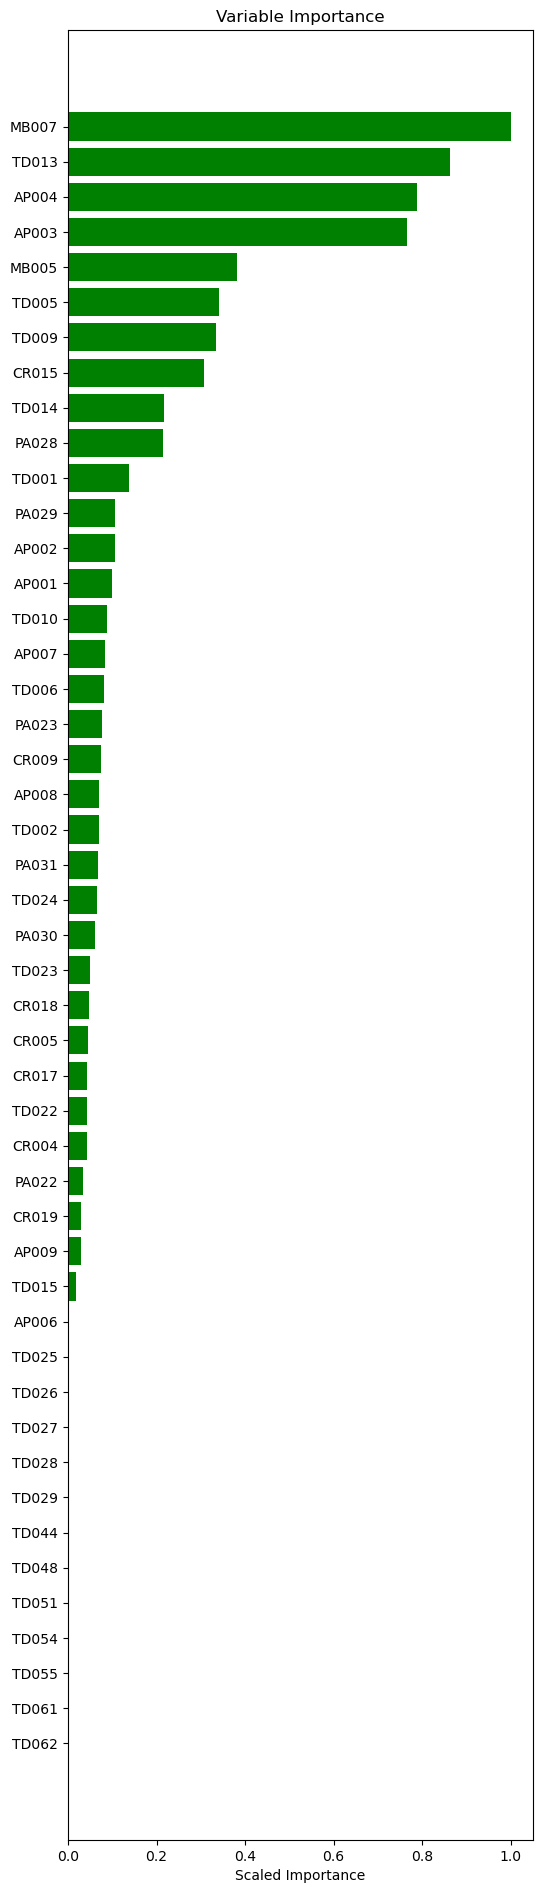

In [24]:
VarImp(gbm_v2)

We can see that around 30 variables are shown significantly important to the model performance. My initial thought is to drop the less important variables (scaled importance < 0.06) and see whether it can improve model performance.

### 2.2 Feature Engineering <a class="anchor" id="22"></a>

#### 2.2.1 Feature Selection <a class="anchor" id="221"></a>

In [25]:
# Build a dataframe to show the variables importance 
varimportance_df=gbm_v2._model_json['output']['variable_importances'].as_data_frame()
varimportance_df

,variable,relative_importance,scaled_importance,percentage
0,MB007,633.054260,1.000000,0.147494
1,TD013,546.670593,0.863545,0.127368
2,AP004,498.315948,0.787162,0.116102
3,AP003,485.087250,0.766265,0.113020
4,MB005,241.284531,0.381144,0.056216
5,TD005,215.801483,0.340889,0.050279
6,TD009,211.974640,0.334844,0.049388
7,CR015,194.431503,0.307132,0.045300
8,TD014,137.981888,0.217962,0.032148
9,PA028,135.159668,0.213504,0.031491


In [26]:
# Select those most significantly important variables as predictors 
predictors2 = varimportance_df[varimportance_df['scaled_importance']>0.06]['variable'].tolist()

##### 2.2.1.1 Iterate Model <a class="anchor" id="2211"></a>

In [27]:
# Build GBM model with selected features
gbm_v3 = H2OGradientBoostingEstimator(
        model_id = 'gbm_v3',
        seed=1234)
gbm_v3.train(predictors2,target,training_frame=train_hex)

gbm Model Build progress: |██████████████████████████████████████████████████████| (done) 100%


Model Details
=============
H2OGradientBoostingEstimator : Gradient Boosting Machine
Model Key: gbm_v3


Model Summary: 
    number_of_trees    number_of_internal_trees    model_size_in_bytes    min_depth    max_depth    mean_depth    min_leaves    max_leaves    mean_leaves
--  -----------------  --------------------------  ---------------------  -----------  -----------  ------------  ------------  ------------  -------------
    50                 50                          25702                  5            5            5             23            32            28.58

ModelMetricsRegression: gbm
** Reported on train data. **

MSE: 0.13901977868566728
RMSE: 0.3728535619860259
MAE: 0.284892433070243
RMSLE: 0.2608950750487049
Mean Residual Deviance: 0.13901977868566728

Scoring History: 
     timestamp            duration    number_of_trees    training_rmse        training_mae         training_deviance
---  -------------------  ----------  -----------------  -------------------  -------------------  -------------------
     2023-07-26 00:13:56  0.029 sec   0.0                0.39465301215116366  0.3115019999999918   0.15575099999998654
     2023-07-26 00:13:56  0.046 sec   1.0                0.3927021939359815   0.30988517110142855  0.1542150131221332
     2023-07-26 00:13:56  0.055 sec   2.0                0.3910683095836767   0.30841624300864834  0.15293442276063443
     2023-07-26 00:13:56  0.065 sec   3.0                0.3896534622083847   0.3070710975856831   0.1518298206109811
     2023-07-26 00:13:56  0.074 sec   4.0                0.38839440022902244  0.3057897764146328   0.15085021012926206
     2023-07-26 00:13:56  0.084 sec   5.0                0.3873269832208269   0.3046329341111705   0.15002219193094676
     2023-07-26 00:13:56  0.093 sec   6.0                0.38633094137326607  0.3035405204064834   0.14925159626235393
     2023-07-26 00:13:56  0.102 sec   7.0                0.38543662743748797  0.3025132874396319   0.1485613937703849
     2023-07-26 00:13:56  0.110 sec   8.0                0.38463636455783645  0.30158272706173983  0.14794513294026887
     2023-07-26 00:13:56  0.120 sec   9.0                0.3839470705130902   0.3007273958317625   0.14741535295558383
---  ---                  ---         ---                ---                  ---                  ---
     2023-07-26 00:13:57  0.406 sec   41.0               0.37411655523860254  0.2866314830674795   0.13996319690359835
     2023-07-26 00:13:57  0.413 sec   42.0               0.37399050508689197  0.2864291868928728   0.13986889789514856
     2023-07-26 00:13:57  0.422 sec   43.0               0.373835238484519    0.28623463831208573  0.13975278553277717
     2023-07-26 00:13:57  0.430 sec   44.0               0.3736999757213791   0.2860280234299189   0.13965167185415933
     2023-07-26 00:13:57  0.440 sec   45.0               0.37355458949653697  0.28583870824548285  0.13954303133392626
     2023-07-26 00:13:57  0.449 sec   46.0               0.3734337097478103   0.2856459301401325   0.13945273557601184
     2023-07-26 00:13:57  0.458 sec   47.0               0.37324433714354877  0.28540824996447495  0.13931133520972708
     2023-07-26 00:13:57  0.466 sec   48.0               0.37311594842261164  0.28522070022000356  0.13921551096730497
     2023-07-26 00:13:57  0.475 sec   49.0               0.3729605754317555   0.2850654900927475   0.13909959082638618
     2023-07-26 00:13:57  0.483 sec   50.0               0.3728535619860259   0.284892433070243    0.13901977868566728
[51 rows x 7 columns]


Variable Importances: 
variable    relative_importance    scaled_importance    percentage
----------  ---------------------  -------------------  --------------------
MB007       669.4551391601562      1.0                  0.1594482364364037
TD013       548.2941284179688      0.8190154893811313   0.13059057539591953
AP004       494.5237121582031      0.7386958187797201   0.11778374556737166
AP003       493.6555480957031      0.7373989969141219   0.1175769

##### 2.2.1.2 Model Performance <a class="anchor" id="2212"></a>

gbm prediction progress: |███████████████████████████████████████████████████████| (done) 100%

   * ROC curve: The ROC curve plots the true positive rate vs. the false rositive sate

	  * The area under the curve (AUC): A value between 0.5 (random) and 1.0 (perfect), measuring the prediction accuracy

   * Recall (R) = The number of true positives / (the number of true positives + the number of false negatives)



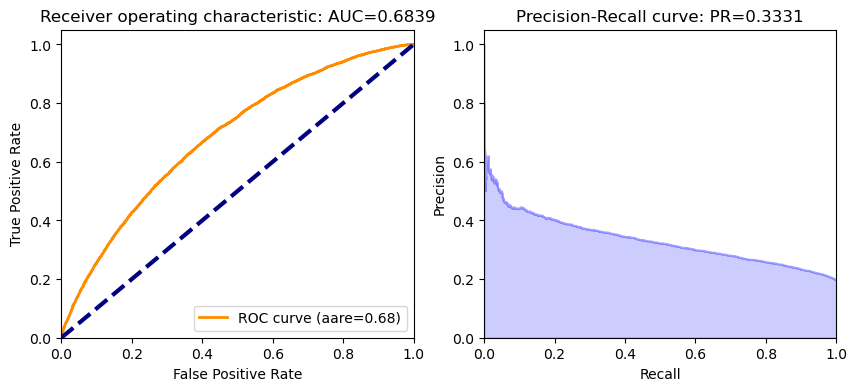

In [28]:
ROC_AUC(gbm_v3,test_hex,'loan_default')

Both AUC (0.6839 > 0.6837) and PR (0.3331 > 0.3319) are slightly increased after feature selection. The model performance can be improved by focusing on those most important variables.

In [29]:
createGains(gbm_v3)

gbm prediction progress: |███████████████████████████████████████████████████████| (done) 100%


,count,actual,non_actual,cum_count,cum_actual,cum_non_actual,percent_cum_actual,percent_cum_non_actual,if_random,lift,K_S,gain
decile,,,,,,,,,,,,
0,3200,1282,1918,3200,1282,1918,0.21,0.07,622.4,2.06,14.0,40.06
1,3200,985,2215,6400,2267,4133,0.36,0.16,1244.8,1.82,20.0,35.42
2,3200,826,2374,9600,3093,6507,0.50,0.25,1867.2,1.66,25.0,32.22
3,3200,717,2483,12800,3810,8990,0.61,0.35,2489.6,1.53,26.0,29.77
4,3200,632,2568,16000,4442,11558,0.71,0.45,3112.0,1.43,26.0,27.76
5,3200,523,2677,19200,4965,14235,0.80,0.55,3734.4,1.33,25.0,25.86
6,3200,457,2743,22400,5422,16978,0.87,0.66,4356.8,1.24,21.0,24.21
7,3200,354,2846,25600,5776,19824,0.93,0.77,4979.2,1.16,16.0,22.56
8,3200,287,2913,28800,6063,22737,0.97,0.88,5601.6,1.08,9.0,21.05


By comparing the cumulative lift between gbm_v2 and gbm_v3, the latter shows better performance, since most of the cumulative lifts are larger. The model performance can be improved by focusing those important variables. Therefore, I will only use these variables for coming feature engineering and model iteration. 

#### 2.2.2 WOE Transformation <a class="anchor" id="222"></a>

Weight of evidence (WOE) transformation is a widely used technique in credit risk modeling or called the probability of default modeling (such models predict how capable an applicant can repay the loan). The goal of WOE transformation is to get the maximum difference among the binned categories relating to the target variable. In this transformation, the information of the target variable has been utilized. The dataset contains some categorical variables with many categories. These categories are distributed very differently are have various significant impact to the possibility of default as discussed above. Therefore, WOE is a good choice for feature engineering here.

Before jumping to WOE transformation, I will investigate the special values of numeric variables, including missing values (NA), '-99', '-98', '-1'.

In [30]:
# Check missing values
varmissing_df = df[predictors2].isnull().sum().to_frame(name='Missing Values').reset_index().rename(columns={'index': 'Variable'})
var_to_WOE1 =varmissing_df[varmissing_df['Missing Values']!=0]['Variable'].tolist()
var_to_WOE1

['MB005', 'PA028', 'PA029', 'PA023', 'PA031', 'TD024', 'PA030']

In [31]:
# Check whether minimum values cover negative values like '-99' 
df[predictors2].describe().loc['min']

TD013     0.0
AP004     3.0
AP003     1.0
MB005     0.0
TD005     0.0
TD009     0.0
CR015     2.0
TD014     0.0
PA028   -99.0
TD001     0.0
PA029   -99.0
AP002     1.0
AP001    20.0
TD010     0.0
AP007     1.0
TD006     0.0
PA023   -99.0
CR009     0.0
AP008     1.0
TD002     0.0
PA031   -99.0
TD024     0.0
PA030   -99.0
Name: min, dtype: float64

‘-99’, '-98' and '-1' are very likely missing values and set by the systems as extreme values. In a parametric regression, we can not use them blindly as numeric values. I am going to bin the continuous variable, leaving the special values ‘-99’, '-98', ‘-1’, and’NA’ as their categories. These numeric variables will be converted to catogorical variables and I will then conduct WOE transformation for these catogorical variables for better capture their patterns.

In [32]:
# Check the other special variables
print(sum(df['PA023']==-99))
print(sum(df['PA023']==-98))
print(sum(df['PA023']==-1))
print(sum(df['PA023']<0))

1534
0
56004
57538


In [33]:
# Check the other special variables
print(sum(df['PA028']==-99))
print(sum(df['PA028']==-98))
print(sum(df['PA028']==-1))
print(sum(df['PA028']<0))

1534
50639
0
52173


I will include the categorical variables for future WOE transformation as well.

In [34]:
# Extract categorical variables
var_to_WOE_cat = var[var['dtype']=='object']['varname'].tolist()
var_to_WOE_cat

['AP005', 'AP006', 'MB007']

I will also include 'AP002' (CODE_GENDER) and 'AP003' (CODE_EDUCATION) for WOE transformation because these variables are also categorical information. 

In [35]:
var_to_WOE_num = var_to_WOE1 + ['AP002', 'AP003']
var_to_WOE_num

['MB005',
 'PA028',
 'PA029',
 'PA023',
 'PA031',
 'TD024',
 'PA030',
 'AP002',
 'AP003']

In [36]:
# Bin the continuous variable
def binning(df, var):
    # Check for missing values and replace with a default value if necessary
    df[var] = df[var].fillna("-999")

    # Convert the column to a numeric type (if it is not already)
    df[var] = pd.to_numeric(df[var], errors='coerce')

    # Check if the column contains NaN values after conversion
    if df[var].isnull().any():
        print(f"Warning: {var} contains NaN values after conversion. Check the data.")

    # Perform qcut on the numeric data
    if not df[var].empty:
        df[var + '_bin'] = pd.qcut(df[var], 10, duplicates='drop').values.add_categories("NoData")
        df[var + '_bin'] = df[var + '_bin'].fillna("NoData").astype(str)
        df[var + '_bin'].value_counts(dropna=False)
    
    # Handle specific values like -99, -98, and -1
    df.loc[df[var] == -999, var + '_bin'] = "NoData"
    df.loc[df[var] == -99, var + '_bin'] = -99
    df.loc[df[var] == -98, var + '_bin'] = -98
    df.loc[df[var] == -1, var + '_bin'] = -1

# Apply binning to train and test data
for i in var_to_WOE_num:
    binning(train, i)
    binning(test, i)

var_to_WOE_num_bin = [f + '_bin' for f in var_to_WOE_num]
features_bin = var_to_WOE_num_bin + list(var_to_WOE_cat)

Now variables are ready for WOE transformation.

In [37]:
# Calculate WOE for each category 
import category_encoders as ce

ec = ce.WOEEncoder()

def WOE(df, var):
    df[var] = df[var].fillna('NoData')
    X = df[var]
    y = df['loan_default']
    X_WOE = ec.fit(X, y)
    X_cleaned = ec.transform(X).round(2)
    df[var + '_WOE'] = X_cleaned 
    
for i in features_bin:
    WOE(train, i)  
    WOE(test, i)

In [38]:
# After WOE transformation, the original variables will be replaced by their WOE 
var_to_drop = var_to_WOE_num + var_to_WOE_cat
var_WOE = train.filter(like='_WOE').columns.tolist()

In [39]:
# Predictors will be the original variables without WOE transformation and new WOE variables
predictors3 = [x for x in predictors2 if x not in var_to_drop]
predictors3 = predictors3 + var_WOE
predictors3

['TD013',
 'AP004',
 'TD005',
 'TD009',
 'CR015',
 'TD014',
 'TD001',
 'AP001',
 'TD010',
 'AP007',
 'TD006',
 'CR009',
 'AP008',
 'TD002',
 'MB005_bin_WOE',
 'PA028_bin_WOE',
 'PA029_bin_WOE',
 'PA023_bin_WOE',
 'PA031_bin_WOE',
 'TD024_bin_WOE',
 'PA030_bin_WOE',
 'AP002_bin_WOE',
 'AP003_bin_WOE',
 'AP005_WOE',
 'AP006_WOE',
 'MB007_WOE']

In [40]:
# Convert sampled DataFrames into H2OFrame objects
train_hex = h2o.H2OFrame(train)
test_hex = h2o.H2OFrame(test)

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


##### 2.2.2.1 Iterate Model <a class="anchor" id="2221"></a>

In [41]:
# Build GBM model with new variables after feature engineering
gbm_v4 = H2OGradientBoostingEstimator(
        model_id = 'gbm_v4',
        seed=1234)
gbm_v4.train(predictors3,target,training_frame=train_hex)

gbm Model Build progress: |██████████████████████████████████████████████████████| (done) 100%


Model Details
=============
H2OGradientBoostingEstimator : Gradient Boosting Machine
Model Key: gbm_v4


Model Summary: 
    number_of_trees    number_of_internal_trees    model_size_in_bytes    min_depth    max_depth    mean_depth    min_leaves    max_leaves    mean_leaves
--  -----------------  --------------------------  ---------------------  -----------  -----------  ------------  ------------  ------------  -------------
    50                 50                          20773                  5            5            5             22            32            28.36

ModelMetricsRegression: gbm
** Reported on train data. **

MSE: 0.11720379939342945
RMSE: 0.34235040440085573
MAE: 0.24339286725885723
RMSLE: 0.23977175301663992
Mean Residual Deviance: 0.11720379939342945

Scoring History: 
     timestamp            duration    number_of_trees    training_rmse        training_mae         training_deviance
---  -------------------  ----------  -----------------  -------------------  -------------------  -------------------
     2023-07-26 00:14:04  0.032 sec   0.0                0.39465301215116366  0.3115019999999918   0.15575099999998654
     2023-07-26 00:14:04  0.090 sec   1.0                0.3870674081169021   0.3052600825627645   0.14982117842633644
     2023-07-26 00:14:04  0.112 sec   2.0                0.3807505162975783   0.29960940074486037  0.14497095566087242
     2023-07-26 00:14:04  0.126 sec   3.0                0.3755248225597667   0.29453067495611807  0.14101889235854428
     2023-07-26 00:14:04  0.139 sec   4.0                0.3711780410382069   0.28993518761731685  0.1377731381489608
     2023-07-26 00:14:04  0.155 sec   5.0                0.3674970195438954   0.2857448545737813   0.13505405937364626
     2023-07-26 00:14:04  0.170 sec   6.0                0.3643595897179856   0.28190053581275665  0.1327579106194588
     2023-07-26 00:14:04  0.180 sec   7.0                0.36178112491566294  0.27844657805329187  0.13088558234524253
     2023-07-26 00:14:04  0.192 sec   8.0                0.359582596014498    0.2752959629218094   0.12929964335652566
     2023-07-26 00:14:04  0.203 sec   9.0                0.3577361560764859   0.2724518939522095   0.1279751573643799
---  ---                  ---         ---                ---                  ---                  ---
     2023-07-26 00:14:04  0.578 sec   41.0               0.3435053549170781   0.24451375091124827  0.11799592885670779
     2023-07-26 00:14:04  0.589 sec   42.0               0.34330885260488614  0.24428845994783235  0.11786096827688343
     2023-07-26 00:14:04  0.600 sec   43.0               0.3431966931359934   0.24417666332097754  0.11778397017948122
     2023-07-26 00:14:04  0.612 sec   44.0               0.34308977085157766  0.2440414839467512   0.11771059086298806
     2023-07-26 00:14:04  0.622 sec   45.0               0.3429295219587777   0.24386219678737023  0.11760065703087579
     2023-07-26 00:14:04  0.632 sec   46.0               0.342800801854998    0.2437825676820139   0.1175123897524296
     2023-07-26 00:14:04  0.643 sec   47.0               0.34264706355554975  0.24370884953209315  0.11740701016324095
     2023-07-26 00:14:04  0.655 sec   48.0               0.3425784066910909   0.24360882847588983  0.11735996473100647
     2023-07-26 00:14:04  0.668 sec   49.0               0.34243006690834565  0.24345597319219556  0.1172583507228541
     2023-07-26 00:14:04  0.678 sec   50.0               0.34235040440085573  0.24339286725885723  0.11720379939342945
[51 rows x 7 columns]


Variable Importances: 
variable       relative_importance    scaled_importance      percentage
-------------  ---------------------  ---------------------  ---------------------
AP005_WOE      6847.59814453125       1.0                    0.703165954423098
TD013          494.8740539550781      0.07226972779503762    0.050817612120895125
AP004          475.9896545410156      0.06951191417696713    0.04887841147602357
AP003_bin_WOE  223.56884765625       

##### 2.2.2.2 Model Performance <a class="anchor" id="2222"></a>

With the new feature engineering and WOE transformation, the model's performance has significantly improved compared to the previous model.

gbm prediction progress: |███████████████████████████████████████████████████████| (done) 100%

   * ROC curve: The ROC curve plots the true positive rate vs. the false rositive sate

	  * The area under the curve (AUC): A value between 0.5 (random) and 1.0 (perfect), measuring the prediction accuracy

   * Recall (R) = The number of true positives / (the number of true positives + the number of false negatives)



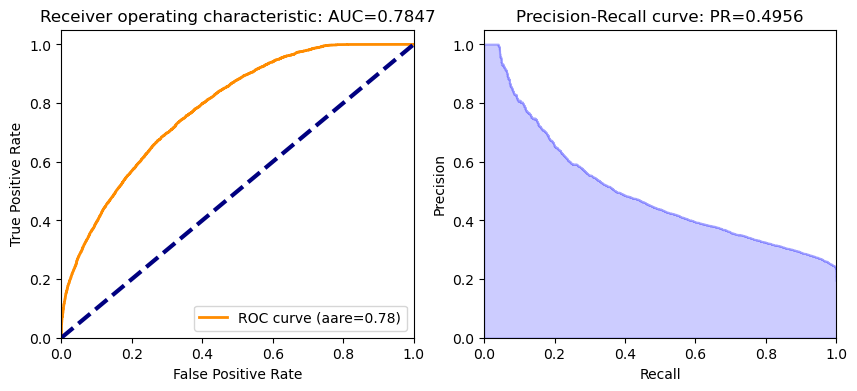

In [42]:
ROC_AUC(gbm_v4,test_hex,'loan_default')

AUC (Area Under the Curve): The AUC value of 0.7847 indicates that the model's discriminatory power has substantially increased. A higher AUC value suggests that the model is better at distinguishing between positive and negative samples. An AUC of 0.7847 means that the model's ability to correctly rank loan default probabilities is quite good.

PR (Precision-Recall): The PR value of 0.4956 indicates that the model's precision-recall trade-off has also improved. The model is now achieving a higher precision while maintaining good recall. A PR value of 0.4956 suggests that the model is better at identifying actual loan defaults while reducing false positives.

In [43]:
createGains(gbm_v4)

gbm prediction progress: |███████████████████████████████████████████████████████| (done) 100%


,count,actual,non_actual,cum_count,cum_actual,cum_non_actual,percent_cum_actual,percent_cum_non_actual,if_random,lift,K_S,gain
decile,,,,,,,,,,,,
0,3200,1802,1398,3200,1802,1398,0.29,0.05,622.4,2.90,24.0,56.31
1,3200,1099,2101,6400,2901,3499,0.47,0.14,1244.8,2.33,33.0,45.33
2,3200,866,2334,9600,3767,5833,0.61,0.23,1867.2,2.02,38.0,39.24
3,3200,719,2481,12800,4486,8314,0.72,0.32,2489.6,1.80,40.0,35.05
4,3200,600,2600,16000,5086,10914,0.82,0.42,3112.0,1.63,40.0,31.79
5,3200,504,2696,19200,5590,13610,0.90,0.53,3734.4,1.50,37.0,29.11
6,3200,381,2819,22400,5971,16429,0.96,0.64,4356.8,1.37,32.0,26.66
7,3200,230,2970,25600,6201,19399,1.00,0.75,4979.2,1.25,25.0,24.22
8,3200,21,3179,28800,6222,22578,1.00,0.88,5601.6,1.11,12.0,21.60


Gains Table:
The gains table provides detailed insights into the model's performance at different deciles. Each decile represents a grouping of samples based on their predicted probabilities.

Interpretation:

The gains table shows that the new model significantly outperforms the previous one. The lift values are consistently higher, indicating that the model is performing much better than random guessing. The K-S values are also higher, showing improved discriminatory power between actual and non-actual groups.

Moreover, the gain values are higher across all deciles, indicating that the model is better at capturing loan defaults compared to the previous model. For example, at the 10th decile, the model captures 56.31% of the total defaults, whereas the previous model captured only 40.06% at the same decile.

Overall, the new model shows marked improvement in both AUC and PR, indicating that it has better predictive performance and is more effective in identifying loan defaults while maintaining higher precision. This model is likely to be more reliable for loan default prediction and can potentially help in making better lending decisions.

### 2.3 Hyperparameter Tuning <a class="anchor" id="23"></a>

Hyperparameter tuning is important for any machine learning model, including Gradient Boosting Machines (GBM), in a loan default prediction project for several reasons:

1. Performance Improvement: Hyperparameter tuning helps to find the optimal set of hyperparameters that lead to the best model performance. By identifying the right combination of hyperparameters, the GBM model can achieve higher accuracy, better precision, and recall, which are crucial in loan default prediction to minimize false negatives and false positives.
2. Overfitting Prevention: GBM models are prone to overfitting, especially when the number of trees or the tree depth is not appropriately controlled. Hyperparameter tuning can mitigate overfitting by finding the optimal values for parameters like "max_depth" and "min_rows_per_node."
3. Model Robustness: A well-tuned GBM model is more robust and generalizes better to unseen data. It can adapt to variations and changes in the loan default prediction data, improving the model's stability.
4. Handling Imbalanced Data: In loan default prediction projects, the dataset is often imbalanced, with a higher number of non-default cases compared to default cases. Hyperparameter tuning can help address class imbalances through techniques like class weights or sampling strategies.
5. Avoiding Underfitting: On the other end of the spectrum, hyperparameter tuning helps to avoid underfitting by increasing model complexity when necessary. For example, increasing the number of trees or the depth of trees can improve model expressiveness when the default patterns are more complex.
6. Comparing Model Variants: Hyperparameter tuning allows you to compare different variants of the GBM model with various hyperparameter combinations. This enables you to understand which hyperparameters have the most significant impact on model performance.

#### 2.3.1 nfolds <a class="anchor" id="231"></a>

Setting nfolds (default is 0) in GBM enables k-fold cross-validation, which helps assess the model's performance on multiple subsets of data. Cross-validation provides a more reliable estimate of model generalization to unseen data, especially in cases of imbalanced data like loan defaults. It reduces the risk of overfitting and helps identify potential issues with model variance or bias. With nfolds=10, the GBM model is trained and evaluated on 10 different data partitions, leading to a more robust and accurate assessment of its predictive capabilities.

##### 2.3.1.1 Iterate Model <a class="anchor" id="2311"></a>

In [44]:
# Build GBM model, setting nfolds=10
gbm_v5 = H2OGradientBoostingEstimator(
        model_id = 'gbm_v5',
        nfolds = 10,
        seed=1234)
gbm_v5.train(predictors3,target,training_frame=train_hex)

gbm Model Build progress: |██████████████████████████████████████████████████████| (done) 100%


Model Details
=============
H2OGradientBoostingEstimator : Gradient Boosting Machine
Model Key: gbm_v5


Model Summary: 
    number_of_trees    number_of_internal_trees    model_size_in_bytes    min_depth    max_depth    mean_depth    min_leaves    max_leaves    mean_leaves
--  -----------------  --------------------------  ---------------------  -----------  -----------  ------------  ------------  ------------  -------------
    50                 50                          20772                  5            5            5             22            32            28.36

ModelMetricsRegression: gbm
** Reported on train data. **

MSE: 0.11720379939342945
RMSE: 0.34235040440085573
MAE: 0.24339286725885723
RMSLE: 0.23977175301663992
Mean Residual Deviance: 0.11720379939342945

ModelMetricsRegression: gbm
** Reported on cross-validation data. **

MSE: 0.12133532024221773
RMSE: 0.3483321981129762
MAE: 0.2477039471890548
RMSLE: 0.24413851962599448
Mean Residual Deviance: 0.12133532024221773

Cross-Validation Metrics Summary: 
                        mean      sd          cv_1_valid    cv_2_valid    cv_3_valid    cv_4_valid    cv_5_valid    cv_6_valid    cv_7_valid    cv_8_valid    cv_9_valid    cv_10_valid
----------------------  --------  ----------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  -------------
mae                     0.247716  0.00427311  0.248625      0.24577       0.248318      0.252357      0.253082      0.238404      0.243884      0.248264      0.248055      0.250404
mean_residual_deviance  0.121342  0.00380258  0.119332      0.118874      0.122024      0.125809      0.126654      0.114139      0.117884      0.122519      0.123191      0.122993
mse                     0.121342  0.00380258  0.119332      0.118874      0.122024      0.125809      0.126654      0.114139      0.117884      0.122519      0.123191      0.122993
r2                      0.220745  0.0117536   0.226066      0.216853      0.234845      0.220325      0.199481      0.237295      0.2182        0.230337      0.215513      0.208541
residual_deviance       0.121342  0.00380258  0.119332      0.118874      0.122024      0.125809      0.126654      0.114139      0.117884      0.122519      0.123191      0.122993
rmse                    0.348303  0.0054759   0.345445      0.344782      0.34932       0.354696      0.355885      0.337845      0.343343      0.350027      0.350986      0.350703
rmsle                   0.244127  0.00321447  0.243097      0.24207       0.244088      0.247051      0.248862      0.237495      0.241834      0.245092      0.245253      0.246427

Scoring History: 
     timestamp            duration    number_of_trees    training_rmse        training_mae         training_deviance
---  -------------------  ----------  -----------------  -------------------  -------------------  -------------------
     2023-07-26 00:14:10  4.776 sec   0.0                0.39465301215116366  0.3115019999999918   0.15575099999998654
     2023-07-26 00:14:10  4.788 sec   1.0                0.3870674081169021   0.3052600825627645   0.14982117842633644
     2023-07-26 00:14:10  4.796 sec   2.0                0.3807505162975783   0.29960940074486037  0.14497095566087242
     2023-07-26 00:14:10  4.805 sec   3.0                0.3755248225597667   0.29453067495611807  0.14101889235854428
     2023-07-26 00:14:10  4.813 sec   4.0                0.3711780410382069   0.28993518761731685  0.1377731381489608
     2023-07-26 00:14:10  4.822 sec   5.0                0.3674970195438954   0.2857448545737813   0.13505405937364626
     2023-07-26 00:14:10  4.831 sec   6.0                0.3643595897179856   0.28190053581275665  0.1327579106194588
     2023-07-26 00:14:10  4.840 sec   7.0                0.36178112491566294  0.27844657805329187  0.13088558234524253
     2023-07-26 00:14:10  4.849 sec   8.0                0.359582596014498    0.2752959629218094   0.12929964335652566
 

##### 2.3.1.2 Model Performance <a class="anchor" id="2312"></a>

gbm prediction progress: |███████████████████████████████████████████████████████| (done) 100%

   * ROC curve: The ROC curve plots the true positive rate vs. the false rositive sate

	  * The area under the curve (AUC): A value between 0.5 (random) and 1.0 (perfect), measuring the prediction accuracy

   * Recall (R) = The number of true positives / (the number of true positives + the number of false negatives)



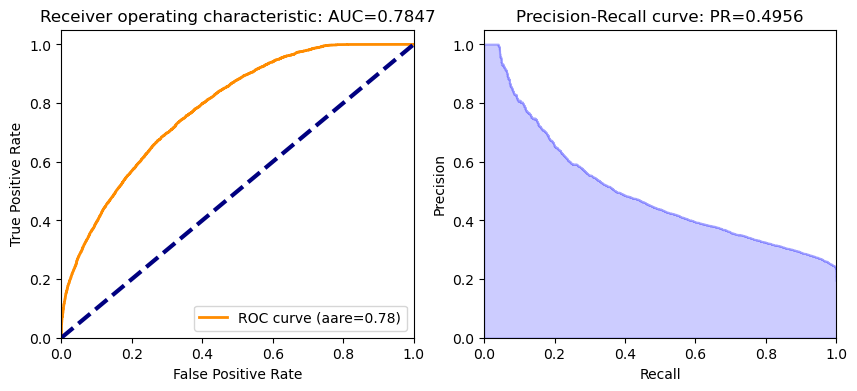

In [45]:
ROC_AUC(gbm_v5,test_hex,'loan_default')

In [46]:
createGains(gbm_v5)

gbm prediction progress: |███████████████████████████████████████████████████████| (done) 100%


,count,actual,non_actual,cum_count,cum_actual,cum_non_actual,percent_cum_actual,percent_cum_non_actual,if_random,lift,K_S,gain
decile,,,,,,,,,,,,
0,3200,1802,1398,3200,1802,1398,0.29,0.05,622.4,2.90,24.0,56.31
1,3200,1099,2101,6400,2901,3499,0.47,0.14,1244.8,2.33,33.0,45.33
2,3200,866,2334,9600,3767,5833,0.61,0.23,1867.2,2.02,38.0,39.24
3,3200,719,2481,12800,4486,8314,0.72,0.32,2489.6,1.80,40.0,35.05
4,3200,600,2600,16000,5086,10914,0.82,0.42,3112.0,1.63,40.0,31.79
5,3200,504,2696,19200,5590,13610,0.90,0.53,3734.4,1.50,37.0,29.11
6,3200,381,2819,22400,5971,16429,0.96,0.64,4356.8,1.37,32.0,26.66
7,3200,230,2970,25600,6201,19399,1.00,0.75,4979.2,1.25,25.0,24.22
8,3200,21,3179,28800,6222,22578,1.00,0.88,5601.6,1.11,12.0,21.60


With 10-fold cross-validation, the model's performance keeps the same as the previous model. There could be several reasons:
1. Insufficient impact of hyperparameters: The default hyperparameters for GBM might already be reasonably well-suited for your data. In some cases, the default settings might be close to the optimal values, and tuning may not lead to significant improvements.
2. Optimal hyperparameters were not explored: Hyperparameter tuning is an iterative process, and the optimal combination of hyperparameters might not have been explored yet. Consider trying a wider range of hyperparameters or using more sophisticated tuning methods like Bayesian optimization.

#### 2.3.2 balance_classes <a class="anchor" id="232"></a>

Activating balance_classes (default is deactivated) addresses the issue of class imbalance. In loan default prediction, the number of non-default instances (negative class) is typically much higher than the number of default instances (positive class). This imbalance can lead the model to bias towards the majority class and perform poorly in detecting loan defaults. By enabling balance_classes, GBM adjusts the class weights during training, giving more importance to the minority class. This helps improve the model's ability to correctly identify loan defaults and ensures a more balanced and accurate predictive performance.

##### 2.3.2.1 Iterate Model <a class="anchor" id="2321"></a>

In [48]:
# Build GBM model, setting balance_classes=True
gbm_v6 = H2OGradientBoostingEstimator(
        model_id = 'gbm_v6',
        nfolds = 10,
        balance_classes=True,
        seed=1234)
gbm_v6.train(predictors3,target,training_frame=train_hex)

gbm Model Build progress: |██████████████████████████████████████████████████████| (done) 100%


Model Details
=============
H2OGradientBoostingEstimator : Gradient Boosting Machine
Model Key: gbm_v6


Model Summary: 
    number_of_trees    number_of_internal_trees    model_size_in_bytes    min_depth    max_depth    mean_depth    min_leaves    max_leaves    mean_leaves
--  -----------------  --------------------------  ---------------------  -----------  -----------  ------------  ------------  ------------  -------------
    50                 50                          20773                  5            5            5             22            32            28.36

ModelMetricsRegression: gbm
** Reported on train data. **

MSE: 0.11720379939342945
RMSE: 0.34235040440085573
MAE: 0.24339286725885723
RMSLE: 0.23977175301663992
Mean Residual Deviance: 0.11720379939342945

ModelMetricsRegression: gbm
** Reported on cross-validation data. **

MSE: 0.12133532024221773
RMSE: 0.3483321981129762
MAE: 0.2477039471890548
RMSLE: 0.24413851962599448
Mean Residual Deviance: 0.12133532024221773

Cross-Validation Metrics Summary: 
                        mean      sd          cv_1_valid    cv_2_valid    cv_3_valid    cv_4_valid    cv_5_valid    cv_6_valid    cv_7_valid    cv_8_valid    cv_9_valid    cv_10_valid
----------------------  --------  ----------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  -------------
mae                     0.247716  0.00427311  0.248625      0.24577       0.248318      0.252357      0.253082      0.238404      0.243884      0.248264      0.248055      0.250404
mean_residual_deviance  0.121342  0.00380258  0.119332      0.118874      0.122024      0.125809      0.126654      0.114139      0.117884      0.122519      0.123191      0.122993
mse                     0.121342  0.00380258  0.119332      0.118874      0.122024      0.125809      0.126654      0.114139      0.117884      0.122519      0.123191      0.122993
r2                      0.220745  0.0117536   0.226066      0.216853      0.234845      0.220325      0.199481      0.237295      0.2182        0.230337      0.215513      0.208541
residual_deviance       0.121342  0.00380258  0.119332      0.118874      0.122024      0.125809      0.126654      0.114139      0.117884      0.122519      0.123191      0.122993
rmse                    0.348303  0.0054759   0.345445      0.344782      0.34932       0.354696      0.355885      0.337845      0.343343      0.350027      0.350986      0.350703
rmsle                   0.244127  0.00321447  0.243097      0.24207       0.244088      0.247051      0.248862      0.237495      0.241834      0.245092      0.245253      0.246427

Scoring History: 
     timestamp            duration    number_of_trees    training_rmse        training_mae         training_deviance
---  -------------------  ----------  -----------------  -------------------  -------------------  -------------------
     2023-07-26 00:14:32  4.229 sec   0.0                0.39465301215116366  0.3115019999999918   0.15575099999998654
     2023-07-26 00:14:32  4.239 sec   1.0                0.3870674081169021   0.3052600825627645   0.14982117842633644
     2023-07-26 00:14:32  4.248 sec   2.0                0.3807505162975783   0.29960940074486037  0.14497095566087242
     2023-07-26 00:14:32  4.257 sec   3.0                0.3755248225597667   0.29453067495611807  0.14101889235854428
     2023-07-26 00:14:32  4.266 sec   4.0                0.3711780410382069   0.28993518761731685  0.1377731381489608
     2023-07-26 00:14:32  4.276 sec   5.0                0.3674970195438954   0.2857448545737813   0.13505405937364626
     2023-07-26 00:14:32  4.285 sec   6.0                0.3643595897179856   0.28190053581275665  0.1327579106194588
     2023-07-26 00:14:32  4.294 sec   7.0                0.36178112491566294  0.27844657805329187  0.13088558234524253
     2023-07-26 00:14:32  4.303 sec   8.0                0.359582596014498    0.2752959629218094   0.12929964335652566
 

##### 2.3.2.2 Model Performance <a class="anchor" id="2322"></a>

gbm prediction progress: |███████████████████████████████████████████████████████| (done) 100%

   * ROC curve: The ROC curve plots the true positive rate vs. the false rositive sate

	  * The area under the curve (AUC): A value between 0.5 (random) and 1.0 (perfect), measuring the prediction accuracy

   * Recall (R) = The number of true positives / (the number of true positives + the number of false negatives)



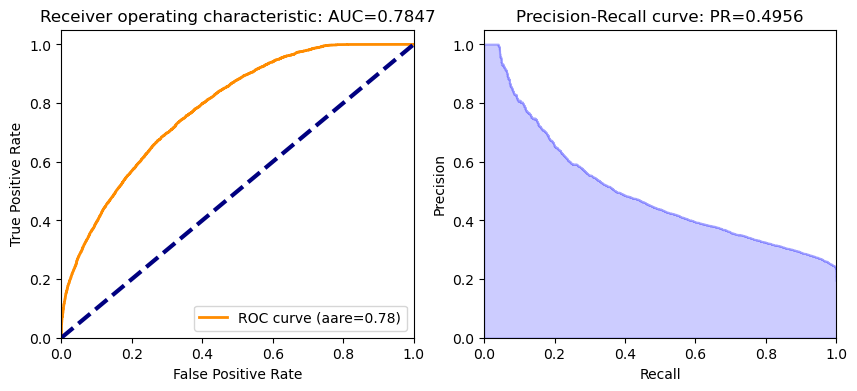

In [49]:
ROC_AUC(gbm_v6,test_hex,'loan_default')

In [50]:
createGains(gbm_v6)

gbm prediction progress: |███████████████████████████████████████████████████████| (done) 100%


,count,actual,non_actual,cum_count,cum_actual,cum_non_actual,percent_cum_actual,percent_cum_non_actual,if_random,lift,K_S,gain
decile,,,,,,,,,,,,
0,3200,1802,1398,3200,1802,1398,0.29,0.05,622.4,2.90,24.0,56.31
1,3200,1099,2101,6400,2901,3499,0.47,0.14,1244.8,2.33,33.0,45.33
2,3200,866,2334,9600,3767,5833,0.61,0.23,1867.2,2.02,38.0,39.24
3,3200,719,2481,12800,4486,8314,0.72,0.32,2489.6,1.80,40.0,35.05
4,3200,600,2600,16000,5086,10914,0.82,0.42,3112.0,1.63,40.0,31.79
5,3200,504,2696,19200,5590,13610,0.90,0.53,3734.4,1.50,37.0,29.11
6,3200,381,2819,22400,5971,16429,0.96,0.64,4356.8,1.37,32.0,26.66
7,3200,230,2970,25600,6201,19399,1.00,0.75,4979.2,1.25,25.0,24.22
8,3200,21,3179,28800,6222,22578,1.00,0.88,5601.6,1.11,12.0,21.60


By setting balance_classes=True, the model's performance keeps the same as the previous model. There could be several reasons:
1. Insufficient impact of hyperparameters: The default hyperparameters for GBM might already be reasonably well-suited for your data. In some cases, the default settings might be close to the optimal values, and tuning may not lead to significant improvements.
2. Optimal hyperparameters were not explored: Hyperparameter tuning is an iterative process, and the optimal combination of hyperparameters might not have been explored yet. Consider trying a wider range of hyperparameters or using more sophisticated tuning methods like Bayesian optimization.

Since cross validation and class balancing cannot improve the model performance but will decrease the speed of modeling process, I will not include them for the next model iteration. 

#### 2.3.2 Other (learning_rates, ntrees, max_depths & min_rows) <a class="anchor" id="232"></a>

Tuning these parameters is important for the GBM model in a loan default prediction project because they directly impact the model's performance and generalization ability, making it more effective in predicting loan defaults.
1. Learning Rate: It controls the step size in each iteration of model training. A smaller learning rate allows the model to converge slowly but can avoid overshooting the optimal solution, while a larger rate may lead to faster convergence but risk overshooting. Tuning it helps strike the right balance between model stability and speed.

2. Number of Trees (ntrees): It determines the size of the ensemble, and more trees can lead to better model performance. However, too many trees can increase training time and overfit the data, so tuning it helps find an optimal value.

3. Maximum Depth of Trees (max_depths): Deeper trees can capture more complex relationships in the data, but excessive depth can lead to overfitting. Tuning this parameter helps avoid overly complex trees.

4. Minimum Number of Samples in a Leaf (min_rows): It sets the minimum number of data points required to create a leaf node. A higher value can prevent overfitting and improve model generalization.

##### 2.3.1.1 Iterate Model <a class="anchor" id="2311"></a>

In [82]:
# Define the range of hyperparameters for tuning
learning_rates = [0.1, 0.01, 0.001]
ntrees = [50, 75, 100]
max_depths = [4, 5, 6]
min_rows = [10, 20, 30]

hyper_parameters = {
    'learn_rate': learning_rates,
    'ntrees': ntrees,
    'max_depth': max_depths,
    'min_rows': min_rows,
}

In [83]:
# Conduct grid search for specified hyperparameters tuning
from h2o.grid.grid_search import H2OGridSearch

grid = H2OGridSearch(model=H2OGradientBoostingEstimator, hyper_params=hyper_parameters)
grid.train(predictors3, target, training_frame=train_hex)

gbm Grid Build progress: |███████████████████████████████████████████████████████| (done) 100%


,learn_rate,max_depth,min_rows,ntrees,model_ids,residual_deviance
,0.1,6.0,10.0,100.0,Grid_GBM_Key_Frame__upload_9a1102ef38c9a7cb4c0047928e744200.hex_model_python_1690344810588_4_model_61,0.1101450
,0.1,6.0,20.0,100.0,Grid_GBM_Key_Frame__upload_9a1102ef38c9a7cb4c0047928e744200.hex_model_python_1690344810588_4_model_70,0.1113860
,0.1,6.0,30.0,100.0,Grid_GBM_Key_Frame__upload_9a1102ef38c9a7cb4c0047928e744200.hex_model_python_1690344810588_4_model_79,0.1118047
,0.1,6.0,10.0,75.0,Grid_GBM_Key_Frame__upload_9a1102ef38c9a7cb4c0047928e744200.hex_model_python_1690344810588_4_model_34,0.1120323
,0.1,6.0,20.0,75.0,Grid_GBM_Key_Frame__upload_9a1102ef38c9a7cb4c0047928e744200.hex_model_python_1690344810588_4_model_43,0.1127329
,0.1,6.0,30.0,75.0,Grid_GBM_Key_Frame__upload_9a1102ef38c9a7cb4c0047928e744200.hex_model_python_1690344810588_4_model_52,0.1130118
,0.1,5.0,10.0,100.0,Grid_GBM_Key_Frame__upload_9a1102ef38c9a7cb4c0047928e744200.hex_model_python_1690344810588_4_model_58,0.1142016
,0.1,6.0,10.0,50.0,Grid_GBM_Key_Frame__upload_9a1102ef38c9a7cb4c0047928e744200.hex_model_python_1690344810588_4_model_7,0.1142732
,0.1,6.0,20.0,50.0,Grid_GBM_Key_Frame__upload_9a1102ef38c9a7cb4c0047928e744200.hex_model_python_1690344810588_4_model_16,0.1144986
,0.1,5.0,20.0,100.0,Grid_GBM_Key_Frame__upload_9a1102ef38c9a7cb4c0047928e744200.hex_model_python_1690344810588_4_model_67,0.1147745


In [85]:
# Check all the hyperparameters selected from the best GBM model in grid search
best_gbm_model = grid.get_grid()[0]
best_gbm_model.actual_params

{'model_id': 'Grid_GBM_Key_Frame__upload_9a1102ef38c9a7cb4c0047928e744200.hex_model_python_1690344810588_5_model_1',
 'training_frame': 'Key_Frame__upload_9a1102ef38c9a7cb4c0047928e744200.hex',
 'validation_frame': None,
 'nfolds': 10,
 'keep_cross_validation_models': True,
 'keep_cross_validation_predictions': False,
 'keep_cross_validation_fold_assignment': False,
 'score_each_iteration': False,
 'score_tree_interval': 0,
 'fold_assignment': 'Random',
 'fold_column': None,
 'response_column': 'loan_default',
 'ignored_columns': ['CD106',
  'CD115',
  'CD169',
  'CR019',
  'PA028_bin',
  'CR004',
  'CD135',
  'TD027',
  'TD023',
  'CD132',
  'CD117',
  'AP002_bin',
  'CR012',
  'AP002',
  'CD123',
  'AP005',
  'TD015',
  'Unnamed: 0',
  'AP006',
  'TD029',
  'PA022',
  'CR005',
  'CD153',
  'TD025',
  'PA029',
  'TD026',
  'CD133',
  'CD164',
  'CD170',
  'AP003',
  'CD162',
  'CD167',
  'CD018',
  'CD088',
  'TD028',
  'MB007',
  'TD044',
  'TD048',
  'CR018',
  'TD054',
  'CD137',
 

In [95]:
# Build GBM model, using selected hyperparameters 
learn_rate=best_gbm_model.actual_params['learn_rate']
ntrees=best_gbm_model.actual_params['ntrees']
max_depth=best_gbm_model.actual_params['max_depth']
min_rows=best_gbm_model.actual_params['min_rows']

gbm_v7 = H2OGradientBoostingEstimator(
        model_id = 'gbm_v7',
        learn_rate=learn_rate,
        ntrees=ntrees,
        max_depth=max_depth,
        min_rows=min_rows,
        seed=1234)
gbm_v7.train(predictors3,target,training_frame=train_hex)

gbm Model Build progress: |██████████████████████████████████████████████████████| (done) 100%


Model Details
=============
H2OGradientBoostingEstimator : Gradient Boosting Machine
Model Key: gbm_v7


Model Summary: 
    number_of_trees    number_of_internal_trees    model_size_in_bytes    min_depth    max_depth    mean_depth    min_leaves    max_leaves    mean_leaves
--  -----------------  --------------------------  ---------------------  -----------  -----------  ------------  ------------  ------------  -------------
    100                100                         23827                  4            4            4             6             16            14.35

ModelMetricsRegression: gbm
** Reported on train data. **

MSE: 0.1176830628361085
RMSE: 0.34304965068646914
MAE: 0.24554563461414963
RMSLE: 0.24060782029773137
Mean Residual Deviance: 0.1176830628361085

ModelMetricsRegression: gbm
** Reported on cross-validation data. **

MSE: 0.12114689499219881
RMSE: 0.34806162527948814
MAE: 0.24927857261859343
RMSLE: 0.24429958443969646
Mean Residual Deviance: 0.12114689499219881

Cross-Validation Metrics Summary: 
                        mean      sd          cv_1_valid    cv_2_valid    cv_3_valid    cv_4_valid    cv_5_valid    cv_6_valid    cv_7_valid    cv_8_valid    cv_9_valid    cv_10_valid
----------------------  --------  ----------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  -------------
mae                     0.249293  0.00421684  0.250454      0.247631      0.24965       0.25353       0.254036      0.239541      0.24597       0.249825      0.250131      0.252162
mean_residual_deviance  0.121155  0.00382272  0.119279      0.118771      0.121449      0.125434      0.126377      0.113705      0.11777       0.122448      0.123071      0.123243
mse                     0.121155  0.00382272  0.119279      0.118771      0.121449      0.125434      0.126377      0.113705      0.11777       0.122448      0.123071      0.123243
r2                      0.221942  0.012556    0.226407      0.217535      0.238454      0.22265       0.201234      0.240194      0.218954      0.230783      0.216277      0.206934
residual_deviance       0.121155  0.00382272  0.119279      0.118771      0.121449      0.125434      0.126377      0.113705      0.11777       0.122448      0.123071      0.123243
rmse                    0.348034  0.00551314  0.345368      0.344631      0.348495      0.354167      0.355495      0.337202      0.343177      0.349926      0.350815      0.351059
rmsle                   0.244288  0.00329338  0.243353      0.242314      0.24392       0.247056      0.248894      0.237309      0.242091      0.245414      0.245487      0.247042

Scoring History: 
     timestamp            duration    number_of_trees    training_rmse        training_mae         training_deviance
---  -------------------  ----------  -----------------  -------------------  -------------------  -------------------
     2023-07-26 12:28:31  6.949 sec   0.0                0.39465301215116366  0.3115019999999918   0.15575099999998654
     2023-07-26 12:28:31  6.957 sec   1.0                0.3873797393859529   0.3055146965409319   0.15006306248672877
     2023-07-26 12:28:31  6.964 sec   2.0                0.3813512476552494   0.30011128943941245  0.1454287740882154
     2023-07-26 12:28:32  6.971 sec   3.0                0.37637431509886227  0.29524165485054255  0.14165762506613766
     2023-07-26 12:28:32  6.979 sec   4.0                0.37224767140815423  0.29087431634807337  0.13856832886879317
     2023-07-26 12:28:32  6.986 sec   5.0                0.3687663192106263   0.286913663562232    0.13598859818415351
     2023-07-26 12:28:32  7.005 sec   6.0                0.36585665018675695  0.28329127277558047  0.13385108848587504
     2023-07-26 12:28:32  7.012 sec   7.0                0.36340915719394107  0.2799687814430023   0.13206621553241057
     2023-07-26 12:28:32  7.020 sec   8.0                0.3613857905324219   0.2769882499521288   0.13059968959874352


##### 2.3.1.2 Model Performance <a class="anchor" id="2312"></a>

After conducting Hyperparameter Tuning, the model's performance has improved compared to the previous model.

gbm prediction progress: |███████████████████████████████████████████████████████| (done) 100%

   * ROC curve: The ROC curve plots the true positive rate vs. the false rositive sate

	  * The area under the curve (AUC): A value between 0.5 (random) and 1.0 (perfect), measuring the prediction accuracy

   * Recall (R) = The number of true positives / (the number of true positives + the number of false negatives)



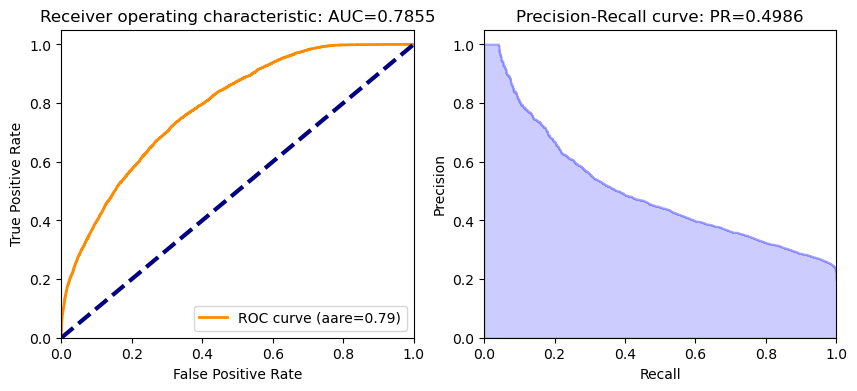

In [96]:
ROC_AUC(gbm_v7,test_hex,'loan_default')

AUC (Area Under the Curve): The AUC value of 0.7855 indicates that the model's discriminatory power has increased. A higher AUC value suggests that the model is better at distinguishing between positive and negative samples. An AUC of 0.7855 means that the model's ability to correctly rank loan default probabilities is quite good.

PR (Precision-Recall): The PR value of 0.4986 indicates that the model's precision-recall trade-off has also improved. The model is now achieving a higher precision while maintaining good recall. A PR value of 0.4986 suggests that the model is better at identifying actual loan defaults while reducing false positives.

In [97]:
createGains(gbm_v7)

gbm prediction progress: |███████████████████████████████████████████████████████| (done) 100%


,count,actual,non_actual,cum_count,cum_actual,cum_non_actual,percent_cum_actual,percent_cum_non_actual,if_random,lift,K_S,gain
decile,,,,,,,,,,,,
0,3200,1812,1388,3200,1812,1388,0.29,0.05,622.4,2.91,24.0,56.62
1,3200,1106,2094,6400,2918,3482,0.47,0.14,1244.8,2.34,33.0,45.59
2,3200,877,2323,9600,3795,5805,0.61,0.23,1867.2,2.03,38.0,39.53
3,3200,736,2464,12800,4531,8269,0.73,0.32,2489.6,1.82,41.0,35.40
4,3200,558,2642,16000,5089,10911,0.82,0.42,3112.0,1.64,40.0,31.81
5,3200,460,2740,19200,5549,13651,0.89,0.53,3734.4,1.49,36.0,28.90
6,3200,408,2792,22400,5957,16443,0.96,0.64,4356.8,1.37,32.0,26.59
7,3200,230,2970,25600,6187,19413,0.99,0.75,4979.2,1.24,24.0,24.17
8,3200,34,3166,28800,6221,22579,1.00,0.88,5601.6,1.11,12.0,21.60


Gains Table: The gains table provides detailed insights into the model's performance at different deciles. Each decile represents a grouping of samples based on their predicted probabilities.

Interpretation:

The gains table shows that the new model outperforms the previous one. The lift values are consistently higher, indicating that the model is performing much better than random guessing. The K-S values are also higher, showing improved discriminatory power between actual and non-actual groups.

Moreover, the gain values are higher across all deciles, indicating that the model is better at capturing loan defaults compared to the previous model. For example, at the 10th decile, the model captures 56.62% of the total defaults, whereas the previous model captured only 56.31% at the same decile.

Overall, the new model shows slight improvement in both AUC and PR, indicating that it has better predictive performance and is more effective in identifying loan defaults while maintaining higher precision. This model is likely to be more reliable for loan default prediction and can potentially help in making better lending decisions.

## 3. Deep Learning<a class="anchor" id="3"></a>

Deep learning is suitable for a loan default prediction project for several reasons:

1. Non-linear Relationships: Loan default prediction often involves complex and non-linear relationships between various features and the target variable (default/non-default). Deep learning models, with their multiple layers and activation functions, are well-suited to capture these intricate non-linear relationships, which might be challenging for traditional linear models.

2. Feature Learning: Deep learning models can automatically learn relevant features and representations from the raw data. This feature learning capability can be especially valuable in loan default prediction, where certain important patterns and relationships might not be evident in the raw data but can be captured by the deep learning model.

3. Handling High-Dimensional Data: Loan default prediction projects typically involve a large number of features and data points. Deep learning models, especially neural networks, can effectively handle high-dimensional data and are less likely to suffer from the curse of dimensionality.

4. Adaptability to Diverse Data Types: Deep learning models can handle a wide range of data types, including numerical, categorical, and text data. This flexibility allows them to incorporate different types of information, such as financial data, credit history, and personal information, which are all relevant in loan default prediction.

5. Model Interpretability: While deep learning models are often considered "black boxes" due to their complexity, efforts have been made to improve model interpretability. Various techniques, such as SHAP (SHapley Additive exPlanations), can help to understand the model's decision-making process and identify the important features contributing to the loan default prediction.

### 3.1 Build Model (Raw Variables) <a class="anchor" id="31"></a>

In [167]:
# Check the number of variables used as predictors
len(predictors)

56

In [123]:
# Build deep learning model with all the original variables
from h2o.estimators.deeplearning import H2ODeepLearningEstimator
dl_v1 = H2ODeepLearningEstimator(
    distribution="tweedie",
    activation="RectifierWithDropout",
    hidden=[30,30,30],
    input_dropout_ratio=0.2,
    sparse=True,
    l1=1e-5,
    epochs=10,
    seed=1234)
dl_v1.train(
    x=predictors,
    y=target,
    training_frame=train_hex,
    validation_frame=test_hex)

deeplearning Model Build progress: |█████████████████████████████████████████████| (done) 100%


Model Details
=============
H2ODeepLearningEstimator : Deep Learning
Model Key: DeepLearning_model_python_1690344810588_31


Status of Neuron Layers: predicting loan_default, regression, tweedie distribution, Automatic loss, 6,451 weights/biases, 89.0 KB, 480,000 training samples, mini-batch size 1
    layer    units    type              dropout    l1     l2    mean_rate              rate_rms                momentum    mean_weight            weight_rms           mean_bias            bias_rms
--  -------  -------  ----------------  ---------  -----  ----  ---------------------  ----------------------  ----------  ---------------------  -------------------  -------------------  -----------------------
    1        151      Input             20.0
    2        30       RectifierDropout  50.0       1e-05  0.0   0.21984940111753018    0.405387282371521       0.0         -0.005557577971706774  0.11560812592506409  0.4485454242035409   0.05000367760658264
    3        30       RectifierDropout  50.0       1e-05  0.0   0.0038454014315114668  0.0032471222802996635   0.0         -0.030140901198901702  0.1901574730873108   0.6616182559063175   0.30801165103912354
    4        30       RectifierDropout  50.0       1e-05  0.0   0.009254922836132917   0.014360986649990082    0.0         -0.09501851522590186   0.19189530611038208  0.6451324592449983   0.22131627798080444
    5        1        Linear                       1e-05  0.0   0.0004018451967567671  0.00021242030197754502  0.0         -0.095911643273818     0.0991358757019043   -1.2450775909526548  1.0971281125650402e-154

ModelMetricsRegression: deeplearning
** Reported on train data. **

MSE: 0.15345144481394432
RMSE: 0.39172878987118664
MAE: 0.3178680896013031
RMSLE: 0.2762246803539292
Mean Residual Deviance: 1.9263535029759329

ModelMetricsRegression: deeplearning
** Reported on validation data. **

MSE: 0.15184305829382388
RMSE: 0.3896704483198898
MAE: 0.3163697009779907
RMSLE: 0.2750762479084514
Mean Residual Deviance: 1.9216296694145294

Scoring History: 
    timestamp            duration    training_speed    epochs    iterations    samples    training_rmse    training_deviance    training_mae    training_r2    validation_rmse    validation_deviance    validation_mae    validation_r2
--  -------------------  ----------  ----------------  --------  ------------  ---------  ---------------  -------------------  --------------  -------------  -----------------  ---------------------  ----------------  ---------------
    2023-07-26 13:02:29  0.000 sec                     0         0             0          nan              nan                  nan             nan            nan                nan                    nan               nan
    2023-07-26 13:02:29  0.464 sec   272727 obs/sec    1         1             48000      0.391653         1.9266               0.323272        0.0297749      0.38977            1.92228                0.321904          0.0303126
    2023-07-26 13:02:31  1.606 sec   401002 obs/sec    10        10            480000     0.391729         1.92635              0.317868        0.0294016      0.38967            1.92163                0.31637           0.0308081

Variable Importances: 
variable           relative_importance    scaled_importance    percentage
-----------------  ---------------------  -------------------  --------------------
AP003              1.0                    1.0                  0.017997834460467935
TD024              0.7450278997421265     0.7450278997421265   0.013408888807988894
CR009              0.7060198783874512     0.7060198783874512   0.012706828897017049
AP006.android      0.6404814720153809     0.6404814720153809   0.01152727950832965
TD013              0.601851224899292      0.601851224899292    0.010832018715567314
PA028              0.5599715113639832     0.5599715113639832   0.010078274564107008
MB007.OPPO         0.5467830896377563     0.5467830896377563   0.00984091153308354
MB005              0.5406977534294128     0.

#### 3.1.1 Model Performance <a class="anchor" id="311"></a>

In loan default prediction, the model's performance is evaluated using different metrics, such as AUC (Area Under the Receiver Operating Characteristic Curve), PR (Precision-Recall), and Gains Table.

deeplearning prediction progress: |██████████████████████████████████████████████| (done) 100%

   * ROC curve: The ROC curve plots the true positive rate vs. the false rositive sate

	  * The area under the curve (AUC): A value between 0.5 (random) and 1.0 (perfect), measuring the prediction accuracy

   * Recall (R) = The number of true positives / (the number of true positives + the number of false negatives)



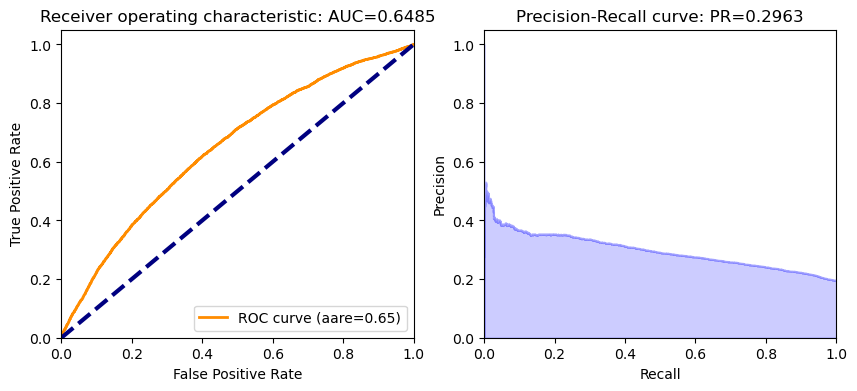

In [124]:
ROC_AUC(dl_v1,test_hex,'loan_default')

AUC (Area Under the Curve): AUC is a popular metric for evaluating binary classification models. It measures the model's ability to distinguish between positive and negative samples. An AUC value of 0.6485 indicates that the model has moderate discriminatory power, but there is room for improvement. The AUC ranges from 0 to 1, where 0.5 represents random guessing, and 1 represents a perfect classifier.

PR (Precision-Recall): PR is another metric used for binary classification, especially when dealing with imbalanced datasets. It focuses on the trade-off between precision (positive predictive value) and recall (sensitivity or true positive rate). The PR value of 0.2963 indicates that the model's precision is relatively low compared to its recall. This means that while the model can identify a good proportion of actual loan defaults (high recall), it may also produce a considerable number of false positives (low precision).

In [125]:
createGains(dl_v1)

deeplearning prediction progress: |██████████████████████████████████████████████| (done) 100%


,count,actual,non_actual,cum_count,cum_actual,cum_non_actual,percent_cum_actual,percent_cum_non_actual,if_random,lift,K_S,gain
decile,,,,,,,,,,,,
0,3200,1126,2074,3200,1126,2074,0.18,0.08,622.4,1.81,10.0,35.19
1,3200,951,2249,6400,2077,4323,0.33,0.17,1244.8,1.67,16.0,32.45
2,3200,783,2417,9600,2860,6740,0.46,0.26,1867.2,1.53,20.0,29.79
3,3200,708,2492,12800,3568,9232,0.57,0.36,2489.6,1.43,21.0,27.88
4,3200,620,2580,16000,4188,11812,0.67,0.46,3112.0,1.35,21.0,26.17
5,3200,550,2650,19200,4738,14462,0.76,0.56,3734.4,1.27,20.0,24.68
6,3200,487,2713,22400,5225,17175,0.84,0.67,4356.8,1.20,17.0,23.33
7,3200,413,2787,25600,5638,19962,0.91,0.77,4979.2,1.13,14.0,22.02
8,3200,304,2896,28800,5942,22858,0.95,0.89,5601.6,1.06,6.0,20.63


Gains Table:

The gains table provides additional insights into how the model performs across different deciles. A decile represents a grouping of samples based on their predicted probabilities. The gains table shows the cumulative count of actual and non-actual (predicted) loan defaults for each decile, along with various evaluation metrics.

Key Metrics in the Gains Table:

Cumulative Actual: Cumulative count of actual loan defaults observed in each decile.
Cumulative Non-Actual: Cumulative count of non-defaults observed in each decile.
Percent Cumulative Actual: Percentage of cumulative actual loan defaults relative to the total number of actual loan defaults.
Percent Cumulative Non-Actual: Percentage of cumulative non-defaults relative to the total number of non-defaults.
Lift: Lift measures how many times better the model performs compared to a random model. It is calculated as the ratio of the percent cumulative actual to the percent cumulative non-actual.
K-S: The Kolmogorov-Smirnov statistic measures the maximum distance between the cumulative distribution functions of the actual and non-actual groups. It is a measure of the model's discriminatory power.
Gain: The gain is the cumulative percentage of actual loan defaults at each decile. It shows how much of the total default population is captured at each decile.
Interpretation:

From the gains table, we can observe the model's performance at different deciles. The higher the decile, the higher the predicted probabilities of loan default. The gain and lift metrics show how much better the model is performing compared to random selection at each decile. The K-S metric indicates the maximum difference in cumulative percentages between actual and non-actual groups.

Overall, the model seems to perform reasonably well in identifying loan defaults, especially in higher deciles, where the gain is relatively higher. However, there is still room for improvement, especially in terms of precision (PR) and discriminatory power (AUC). Further analysis and model tuning may help improve the model's performance.

#### 3.1.2 Variable Importance <a class="anchor" id="312"></a>

I am going to plot the variable importance for initial feature selection. 

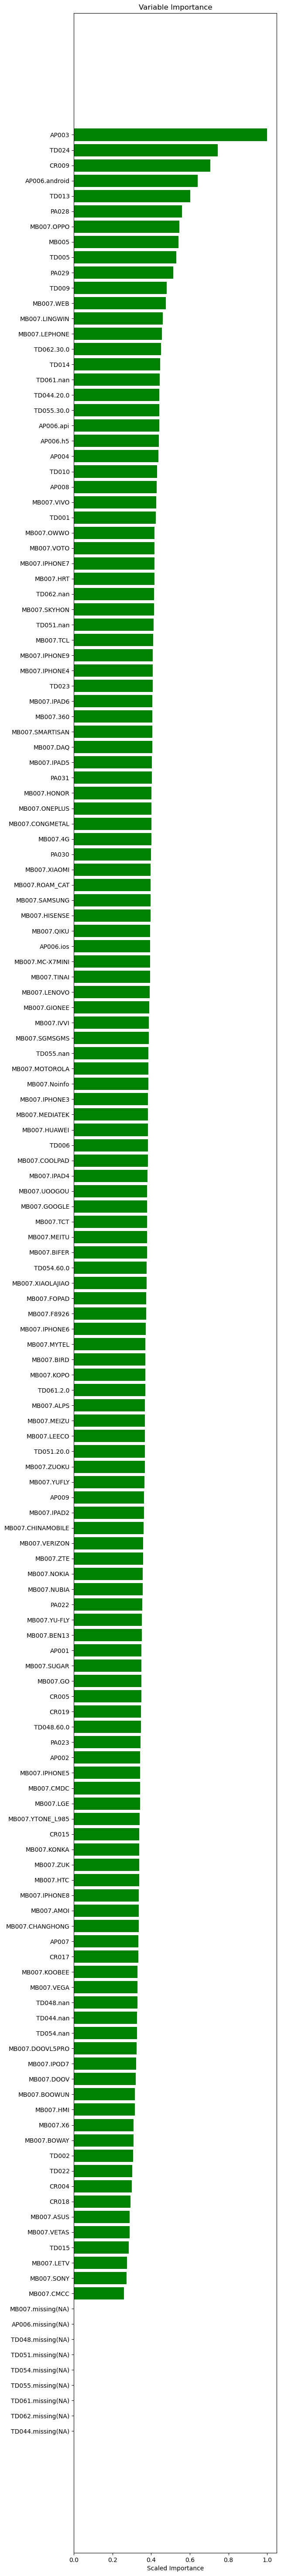

In [126]:
VarImp(dl_v1)

In this variable importance plot for deep learning model, categorical variables are ranked by their separate categories. It is harder to directly extract the most importance original variables from the plot. Additionally, we can notice that some missing values are included here without any special handling, which might provide confused information to modeling. Therefore, I will use the selected features and new features that have handled special values before, to iterate this deep learning model.

### 3.2 Feature Engineering <a class="anchor" id="32"></a>

#### 3.2.1 Iterate Model <a class="anchor" id="321"></a>

In [130]:
# Check the number of variables used as predictors after above feature engineering
len(predictors3)

26

In [131]:
# Build deep learning model with the new variables after above feature engineering
dl_v2 = H2ODeepLearningEstimator(
    distribution="tweedie",
    activation="RectifierWithDropout",
    hidden=[15,15,15],
    input_dropout_ratio=0.2,
    sparse=True,
    l1=1e-5,
    epochs=10,
    seed=1234)
dl_v2.train(
    x=predictors3,
    y=target,
    training_frame=train_hex,
    validation_frame=test_hex)

deeplearning Model Build progress: |█████████████████████████████████████████████| (done) 100%


Model Details
=============
H2ODeepLearningEstimator : Deep Learning
Model Key: DeepLearning_model_python_1690344810588_32


Status of Neuron Layers: predicting loan_default, regression, tweedie distribution, Automatic loss, 886 weights/biases, 19.7 KB, 480,000 training samples, mini-batch size 1
    layer    units    type              dropout    l1     l2    mean_rate               rate_rms                momentum    mean_weight            weight_rms           mean_bias            bias_rms
--  -------  -------  ----------------  ---------  -----  ----  ----------------------  ----------------------  ----------  ---------------------  -------------------  -------------------  -----------------------
    1        25       Input             20.0
    2        15       RectifierDropout  50.0       1e-05  0.0   0.001119567562903588    0.0008930035401135683   0.0         0.00666516020304213    0.21791619062423706  0.4929255943643749   0.029553480446338654
    3        15       RectifierDropout  50.0       1e-05  0.0   0.0012583689700760362   0.0011602230370044708   0.0         -0.015397551982767052  0.24120855331420898  0.9462439718680412   0.12516582012176514
    4        15       RectifierDropout  50.0       1e-05  0.0   0.0018945938941194779   0.0024532927200198174   0.0         -0.05683437445640771   0.24374955892562866  0.996919732530903    0.25514280796051025
    5        1        Linear                       1e-05  0.0   0.00028228377438305565  0.00013323576422408223  0.0         -0.12151798804601034   0.23850631713867188  -0.7856936971593759  1.0971281125650402e-154

ModelMetricsRegression: deeplearning
** Reported on train data. **

MSE: 0.14964351680367827
RMSE: 0.38683784303462126
MAE: 0.3219626046090045
RMSLE: 0.27458419859902033
Mean Residual Deviance: 1.899215900527847

ModelMetricsRegression: deeplearning
** Reported on validation data. **

MSE: 0.1493487523256548
RMSE: 0.3864566629334456
MAE: 0.3197470776782507
RMSLE: 0.27421122621176464
Mean Residual Deviance: 1.904640854607302

Scoring History: 
    timestamp            duration    training_speed    epochs    iterations    samples    training_rmse    training_deviance    training_mae    training_r2    validation_rmse    validation_deviance    validation_mae    validation_r2
--  -------------------  ----------  ----------------  --------  ------------  ---------  ---------------  -------------------  --------------  -------------  -----------------  ---------------------  ----------------  ---------------
    2023-07-26 13:27:09  0.000 sec                     0         0             0          nan              nan                  nan             nan            nan                nan                    nan               nan
    2023-07-26 13:27:09  0.161 sec   888888 obs/sec    1         1             48000      0.386838         1.89922              0.321963        0.0534872      0.386457           1.90464                0.319747          0.0467289
    2023-07-26 13:27:09  0.650 sec   987654 obs/sec    10        10            480000     0.387928         1.88378              0.270317        0.0481446      0.389233           1.91045                0.268935          0.0329838
    2023-07-26 13:27:09  0.717 sec   987654 obs/sec    10        10            480000     0.386838         1.89922              0.321963        0.0534872      0.386457           1.90464                0.319747          0.0467289

Variable Importances: 
variable       relative_importance    scaled_importance    percentage
-------------  ---------------------  -------------------  --------------------
MB005_bin_WOE  1.0                    1.0                  0.05463484758304727
MB007_WOE      0.8893515467643738     0.8893515467643738   0.048589586205218895
AP005_WOE      0.8401623964309692     0.8401623964309692   0.045902144474013744
PA023_bin_WOE  0.8318625688552856     0.8318625688552856   0.0454486846594507
TD014          0.8089931607246399     0.8089931607246399   0.04419921803191836
TD024_bin

#### 3.2.2 Model Performance <a class="anchor" id="322"></a>

With the above feature engineering, the model's performance has significantly improved compared to the previous model.

deeplearning prediction progress: |██████████████████████████████████████████████| (done) 100%

   * ROC curve: The ROC curve plots the true positive rate vs. the false rositive sate

	  * The area under the curve (AUC): A value between 0.5 (random) and 1.0 (perfect), measuring the prediction accuracy

   * Recall (R) = The number of true positives / (the number of true positives + the number of false negatives)



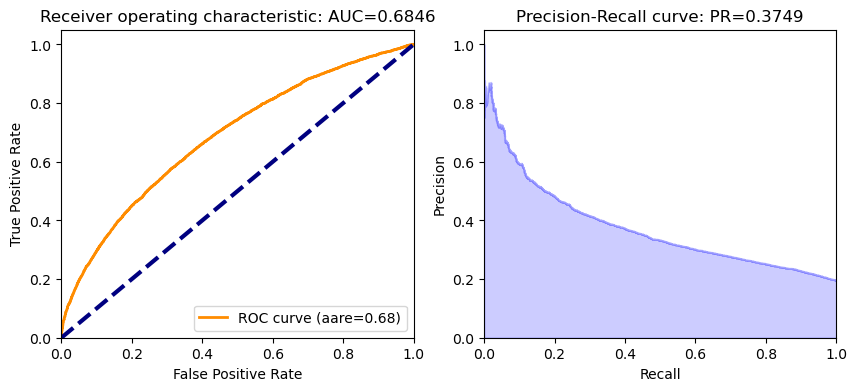

In [133]:
ROC_AUC(dl_v2,test_hex,'loan_default')

AUC (Area Under the Curve): The AUC value of 0.6846 indicates that the model's discriminatory power has substantially increased. A higher AUC value suggests that the model is better at distinguishing between positive and negative samples. An AUC of 0.6846 means that the model's ability to correctly rank loan default probabilities is quite good.

PR (Precision-Recall): The PR value of 0.3749 indicates that the model's precision-recall trade-off has also improved. The model is now achieving a higher precision while maintaining good recall. A PR value of 0.3749 suggests that the model is better at identifying actual loan defaults while reducing false positives.

In [134]:
createGains(dl_v2)

deeplearning prediction progress: |██████████████████████████████████████████████| (done) 100%


,count,actual,non_actual,cum_count,cum_actual,cum_non_actual,percent_cum_actual,percent_cum_non_actual,if_random,lift,K_S,gain
decile,,,,,,,,,,,,
0,3200,1458,1742,3200,1458,1742,0.23,0.07,622.4,2.34,16.0,45.56
1,3200,952,2248,6400,2410,3990,0.39,0.15,1244.8,1.94,24.0,37.66
2,3200,747,2453,9600,3157,6443,0.51,0.25,1867.2,1.69,26.0,32.89
3,3200,647,2553,12800,3804,8996,0.61,0.35,2489.6,1.53,26.0,29.72
4,3200,585,2615,16000,4389,11611,0.71,0.45,3112.0,1.41,26.0,27.43
5,3200,492,2708,19200,4881,14319,0.78,0.56,3734.4,1.31,22.0,25.42
6,3200,440,2760,22400,5321,17079,0.85,0.66,4356.8,1.22,19.0,23.75
7,3200,370,2830,25600,5691,19909,0.91,0.77,4979.2,1.14,14.0,22.23
8,3200,288,2912,28800,5979,22821,0.96,0.89,5601.6,1.07,7.0,20.76


Gains Table: The gains table provides detailed insights into the model's performance at different deciles. Each decile represents a grouping of samples based on their predicted probabilities.

Interpretation:

The gains table shows that the new model significantly outperforms the previous one. The lift values are consistently higher, indicating that the model is performing much better than random guessing. The K-S values are also higher, showing improved discriminatory power between actual and non-actual groups.

Moreover, the gain values are higher across all deciles, indicating that the model is better at capturing loan defaults compared to the previous model. For example, at the 10th decile, the model captures 45.56% of the total defaults, whereas the previous model captured only 35.19% at the same decile.

Overall, the new model shows marked improvement in both AUC and PR, indicating that it has better predictive performance and is more effective in identifying loan defaults while maintaining higher precision. This model is likely to be more reliable for loan default prediction and can potentially help in making better lending decisions.

### 3.3 Hyperparameter Tuning (hidden, input_dropout_ratio, l1) <a class="anchor" id="33"></a>

Hyperparameter tuning is crucial for a deep learning model in a loan default prediction project because deep learning models have a large number of hyperparameters that significantly impact their performance. These models are highly complex and can contain multiple layers with numerous neurons, making hyperparameter optimization vital for the following reasons:

1. Model Performance: Properly tuned hyperparameters can greatly improve the model's predictive performance, ensuring it captures the underlying patterns in the data more accurately and achieves higher accuracy and recall in predicting loan defaults.

2. Generalization: Hyperparameter tuning helps prevent overfitting, ensuring that the model generalizes well to unseen data, which is essential for making reliable predictions in real-world scenarios.

4. Convergence Speed: Optimal hyperparameter values can accelerate the model's convergence during training, reducing the time and resources required to train the deep learning model effectively.

5. Robustness: By fine-tuning hyperparameters, the deep learning model becomes more robust to variations in the data, making it less sensitive to noise and outliers, leading to more stable and reliable predictions.

I selected some crucial hyperparameters for tuning. Tuning these parameters is important because it allows the deep learning model to adapt to the loan default prediction task, preventing overfitting, enhancing generalization, and promoting model interpretability.
1. Hidden Layers (hidden): The number of hidden layers and their sizes (number of neurons) can significantly impact the model's capacity to learn complex patterns from the data. Too few hidden layers or neurons may result in underfitting, where the model fails to capture essential features. Conversely, too many hidden layers or neurons can lead to overfitting, causing the model to memorize noise in the training data and perform poorly on unseen data. Tuning the number of hidden layers and neurons helps strike the right balance between complexity and generalization.

2. Input Dropout (input_dropout_ratio): Dropout is a regularization technique that randomly drops out (sets to zero) a fraction of input neurons during each training iteration. It helps prevent overfitting by promoting the learning of more robust and less co-dependent features. Tuning the input_dropout_ratio determines the dropout rate, which can be critical to controlling overfitting while maintaining effective learning.

3. L1 Regularization (l1): L1 regularization introduces a penalty based on the absolute weights of the model, encouraging sparsity in the model. It helps in feature selection and can lead to a more interpretable model by driving some weights to exactly zero. Tuning the l1 parameter allows controlling the strength of the regularization, striking a balance between feature selection and model complexity.

#### 3.3.1 Iterate Model <a class="anchor" id="331"></a>

In [162]:
# Define the range of hyperparameters for tuning
hyper_params = {
    'hidden': [[15, 15, 15], [20, 20]],
    'input_dropout_ratio': [0.2, 0.2, 0.3],
    'l1': [1e-5, 1e-4, 1e-3]
}

# Conduct grid search for specified hyperparameters tuning
grid = H2OGridSearch(model=H2ODeepLearningEstimator, hyper_params=hyper_params)
grid.train(predictors3, target, training_frame=train_hex, sparse=True, distribution="tweedie")

deeplearning Grid Build progress: |██████████████████████████████████████████████| (done) 100%


,hidden,input_dropout_ratio,l1,model_ids,residual_deviance
,"[20, 20]",0.2,1e-05,Grid_DeepLearning_py_34_sid_b20c_model_python_1690344810588_42_model_2,1.5335695
,"[20, 20]",0.3,0.001,Grid_DeepLearning_py_34_sid_b20c_model_python_1690344810588_42_model_18,1.5461593
,"[20, 20]",0.2,0.001,Grid_DeepLearning_py_34_sid_b20c_model_python_1690344810588_42_model_14,1.5520955
,"[15, 15, 15]",0.3,0.0001,Grid_DeepLearning_py_34_sid_b20c_model_python_1690344810588_42_model_11,1.5646491
,"[20, 20]",0.3,0.0001,Grid_DeepLearning_py_34_sid_b20c_model_python_1690344810588_42_model_12,1.5694830
,"[15, 15, 15]",0.2,0.0001,Grid_DeepLearning_py_34_sid_b20c_model_python_1690344810588_42_model_7,1.5871431
,"[20, 20]",0.2,0.0001,Grid_DeepLearning_py_34_sid_b20c_model_python_1690344810588_42_model_8,1.6062687
,"[15, 15, 15]",0.3,0.001,Grid_DeepLearning_py_34_sid_b20c_model_python_1690344810588_42_model_17,1.6222816
,"[15, 15, 15]",0.3,1e-05,Grid_DeepLearning_py_34_sid_b20c_model_python_1690344810588_42_model_5,1.6273745
,"[15, 15, 15]",0.2,1e-05,Grid_DeepLearning_py_34_sid_b20c_model_python_1690344810588_42_model_1,1.6336130


In [163]:
# Check all the hyperparameters selected from the best deep learning model in grid search
best_dl_model = grid.get_grid()[0]
best_dl_model.params

{'model_id': {'default': None,
  'actual': {'__meta': {'schema_version': 3,
    'schema_name': 'ModelKeyV3',
    'schema_type': 'Key<Model>'},
   'name': 'Grid_DeepLearning_py_34_sid_b20c_model_python_1690344810588_42_model_2',
   'type': 'Key<Model>',
   'URL': '/3/Models/Grid_DeepLearning_py_34_sid_b20c_model_python_1690344810588_42_model_2'},
  'input': None},
 'training_frame': {'default': None,
  'actual': {'__meta': {'schema_version': 3,
    'schema_name': 'FrameKeyV3',
    'schema_type': 'Key<Frame>'},
   'name': 'py_34_sid_b20c',
   'type': 'Key<Frame>',
   'URL': '/3/Frames/py_34_sid_b20c'},
  'input': {'__meta': {'schema_version': 3,
    'schema_name': 'FrameKeyV3',
    'schema_type': 'Key<Frame>'},
   'name': 'py_34_sid_b20c',
   'type': 'Key<Frame>',
   'URL': '/3/Frames/py_34_sid_b20c'}},
 'validation_frame': {'default': None, 'actual': None, 'input': None},
 'nfolds': {'default': 0, 'actual': 0, 'input': 0},
 'keep_cross_validation_models': {'default': True,
  'actual': T

In [164]:
# Build deep learning model, using selected hyperparameters 
dl_v3 = H2ODeepLearningEstimator(
    distribution="tweedie",
    sparse=True,
    hidden=best_dl_model.params['hidden']['actual'],
    input_dropout_ratio=best_dl_model.params['input_dropout_ratio']['actual'],
    l1=best_dl_model.params['l1']['actual'],
    seed=1234)
dl_v3.train(predictors3,target,training_frame=train_hex)

deeplearning Model Build progress: |█████████████████████████████████████████████| (done) 100%


Model Details
=============
H2ODeepLearningEstimator : Deep Learning
Model Key: DeepLearning_model_python_1690344810588_43


Status of Neuron Layers: predicting loan_default, regression, tweedie distribution, Automatic loss, 961 weights/biases, 18.4 KB, 480,000 training samples, mini-batch size 1
    layer    units    type       dropout    l1     l2    mean_rate              rate_rms                momentum    mean_weight           weight_rms           mean_bias             bias_rms
--  -------  -------  ---------  ---------  -----  ----  ---------------------  ----------------------  ----------  --------------------  -------------------  --------------------  -----------------------
    1        25       Input      20.0
    2        20       Rectifier  0.0        1e-05  0.0   0.0004668376501995226  0.00043811684008687735  0.0         -0.03355949774663895  0.2894115447998047   0.482811313665894     0.21958035230636597
    3        20       Rectifier  0.0        1e-05  0.0   0.0008442622273469169  0.0015354380011558533   0.0         -0.03471041984012117  0.24653691053390503  1.0448717206713265    0.22099775075912476
    4        1        Linear                1e-05  0.0   0.0001953307360963663  0.00013127707643434405  0.0         -0.17542471401393414  0.45506179332733154  -0.18979413474007326  1.0971281125650402e-154

ModelMetricsRegression: deeplearning
** Reported on train data. **

MSE: 0.13269718906719252
RMSE: 0.36427625377890405
MAE: 0.26212329549840263
RMSLE: 0.2554549053431369
Mean Residual Deviance: 1.5472668990017804

Scoring History: 
    timestamp            duration    training_speed    epochs    iterations    samples    training_rmse    training_deviance    training_mae    training_r2
--  -------------------  ----------  ----------------  --------  ------------  ---------  ---------------  -------------------  --------------  -------------
    2023-07-26 13:49:38  0.000 sec                     0         0             0          nan              nan                  nan             nan
    2023-07-26 13:49:38  0.122 sec   545454 obs/sec    1         1             48000      0.374814         1.82965              0.295747        0.111414
    2023-07-26 13:49:38  0.744 sec   679886 obs/sec    10        10            480000     0.364276         1.54727              0.262123        0.160675

Variable Importances: 
variable       relative_importance    scaled_importance    percentage
-------------  ---------------------  -------------------  --------------------
AP005_WOE      1.0                    1.0                  0.21417059558493518
AP003_bin_WOE  0.26396381855010986    0.26396381855010986  0.05653328823175079
AP004          0.22378769516944885    0.22378769516944885  0.04792874395902078
CR009          0.21247263252735138    0.21247263252735138  0.045505390253881915
MB005_bin_WOE  0.1855713129043579     0.1855713129043579   0.039743918608204705
TD024_bin_WOE  0.17680624127388       0.17680624127388     0.03786669799676063
TD013          0.173583984375         0.173583984375       0.03717658531759983
PA023_bin_WOE  0.17136847972869873    0.17136847972869873  0.0367020893679803
CR015          0.16738374531269073    0.16738374531269073  0.03584867642485608
TD001          0.16290715336799622    0.16290715336799622  0.03488992206187013
---            ---                    ---                  ---
PA031_bin_WOE  0.14203089475631714    0.14203089475631714  0.03041884132142169
TD002          0.13397061824798584    0.13397061824798584  0.028692567101053112
TD014          0.13394801318645477    0.13394801318645477  0.02868772576156177
TD005          0.132929727435112      0.132929727435112    0.028469638895721034
AP007          0.11763959378004074    0.11763959378004074  0.025194941864241163
TD006          0.11070289462804794    0.11070289462804794  0.02370930487546535
PA029_bin_WOE  0.10984738916158676    0.10984738916158676  0.023526080760187192
PA030_bin_WOE  0.10426249355077744    0.10426249355077744  0.022329960340940

#### 3.3.2 Model Performance <a class="anchor" id="332"></a>

After conducting Hyperparameter Tuning, the model's performance has improved compared to the previous model.

deeplearning prediction progress: |██████████████████████████████████████████████| (done) 100%

   * ROC curve: The ROC curve plots the true positive rate vs. the false rositive sate

	  * The area under the curve (AUC): A value between 0.5 (random) and 1.0 (perfect), measuring the prediction accuracy

   * Recall (R) = The number of true positives / (the number of true positives + the number of false negatives)



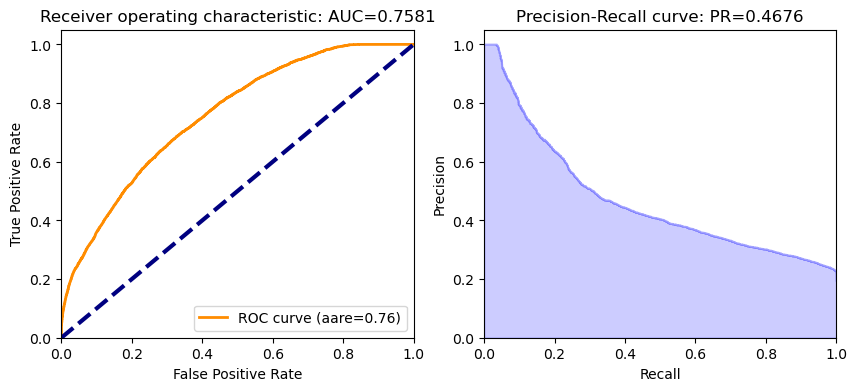

In [165]:
ROC_AUC(dl_v3,test_hex,'loan_default')

AUC (Area Under the Curve): The AUC value of 0.7581 indicates that the model's discriminatory power has increased. A higher AUC value suggests that the model is better at distinguishing between positive and negative samples. An AUC of 0.7581 means that the model's ability to correctly rank loan default probabilities is quite good.

PR (Precision-Recall): The PR value of 0.4676 indicates that the model's precision-recall trade-off has also improved. The model is now achieving a higher precision while maintaining good recall. A PR value of 0.4676 suggests that the model is better at identifying actual loan defaults while reducing false positives.

In [166]:
createGains(dl_v3)

deeplearning prediction progress: |██████████████████████████████████████████████| (done) 100%


,count,actual,non_actual,cum_count,cum_actual,cum_non_actual,percent_cum_actual,percent_cum_non_actual,if_random,lift,K_S,gain
decile,,,,,,,,,,,,
0,3200,1695,1505,3200,1695,1505,0.27,0.06,622.4,2.72,21.0,52.97
1,3200,1029,2171,6400,2724,3676,0.44,0.14,1244.8,2.19,30.0,42.56
2,3200,874,2326,9600,3598,6002,0.58,0.23,1867.2,1.93,35.0,37.48
3,3200,686,2514,12800,4284,8516,0.69,0.33,2489.6,1.72,36.0,33.47
4,3200,585,2615,16000,4869,11131,0.78,0.43,3112.0,1.56,35.0,30.43
5,3200,518,2682,19200,5387,13813,0.87,0.54,3734.4,1.44,33.0,28.06
6,3200,412,2788,22400,5799,16601,0.93,0.64,4356.8,1.33,29.0,25.89
7,3200,315,2885,25600,6114,19486,0.98,0.76,4979.2,1.23,22.0,23.88
8,3200,110,3090,28800,6224,22576,1.00,0.88,5601.6,1.11,12.0,21.61


Gains Table: The gains table provides detailed insights into the model's performance at different deciles. Each decile represents a grouping of samples based on their predicted probabilities.

Interpretation:

The gains table shows that the new model outperforms the previous one. The lift values are consistently higher, indicating that the model is performing much better than random guessing. The K-S values are also higher, showing improved discriminatory power between actual and non-actual groups.

Moreover, the gain values are higher across all deciles, indicating that the model is better at capturing loan defaults compared to the previous model. For example, at the 10th decile, the model captures 52.97% of the total defaults, whereas the previous model captured only 45.56% at the same decile.

Overall, the new model shows slight improvement in both AUC and PR, indicating that it has better predictive performance and is more effective in identifying loan defaults while maintaining higher precision. This model is likely to be more reliable for loan default prediction and can potentially help in making better lending decisions.

## 4. Conclusion<a class="anchor" id="4"></a>

Comparing the performance of the models across feature engineering and hyperparameters tuning, we can see both of them can significantly improve the model's accuracy and stability. Feature engineering handled the special values and captured the informative patterns for modeling. Hyperparameters tuning tested a range of hyperparameters' different values and selected the hyperparameters that can achieve better model performance. 

Comparing the performance of GBM (Gradient Boosting Machine) and deep learning model, the GBM model outperformed the deep learning model for this loan prediction project. There could be several reasons:

1. Data Size and Complexity: GBM models tend to perform well when the dataset is not excessively large and the relationships between features and the target variable are not highly complex. If the dataset is relatively small or the relationships are more linear in nature, GBM can capture the patterns effectively.

2. Feature Engineering: GBM models can benefit from well-engineered features, and it's possible that the feature engineering performed for the GBM model was more effective in capturing relevant information from the data compared to the deep learning model.

3. Training Time and Resources: Deep learning models are more computationally intensive and may require larger computational resources and longer training times. If the available resources were limited or training time was restricted, the deep learning model might not have been able to reach its full potential.

5. Data Availability: Deep learning models typically require a large amount of data to perform at their best. If the loan prediction dataset was not large enough to fully leverage the power of deep learning, the GBM model might have been a better choice for the available data.

6. Overfitting: Deep learning models can be prone to overfitting if not regularized properly, especially with limited data. If the deep learning model was overfitting, it would lead to poorer performance on unseen data.

7. Model Complexity and Interpretability: GBM models are generally easier to interpret than deep learning models. In a domain like loan prediction, where model interpretability is crucial, the GBM model may have been preferred due to its transparency and explainability.

It's essential to consider these factors when choosing a modeling approach. While deep learning can be powerful for certain tasks, the best model choice ultimately depends on the specific characteristics of the dataset, the available resources, and the project requirements.